# Momento de Retroalimentación: Módulo 1 Técnicas de procesamiento de datos para el análisis estadístico y para la construcción de modelos (Portafolio Análisis)

**Jorge Eduardo de Leon Reyna - A00829759**

Consideraciones: Para el desarrollo de esta actividad se hizo uso de la herramienta ChatGPT para tres tareas:
1. Comentar el codigo con el fin de hacerlo mas legible y entendible para cualquier persona.
2. Deteccion y correcion de errores de syntaxis del codigo.
3. Consulta de funcionamiento de funciones y guia de syntaxis del codigo.

## Descripcion del problema

Una empresa automovilística china aspira a entrar en el mercado estadounidense. Desea establecer allí una unidad de fabricación y producir automóviles localmente para competir con sus contrapartes estadounidenses y europeas. Contrataron una empresa de consultoría de automóviles para identificar los principales factores de los que depende el precio de los automóviles, específicamente, en el mercado estadounidense, ya que pueden ser muy diferentes del mercado chino. Esencialmente, la empresa quiere saber:
- Qué variables son significativas para predecir el precio de un automóvil
- Qué tan bien describen esas variables el precio de un automóvil


## Exploración y preparación de la base de datos (Portafolio de Análisis)



#### a) Importacion de datos y paquetes

In [ ]:
#Cargando datos
data = read.csv("/content/precios_autos.csv")
head(data)

,symboling,CarName,fueltype,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,⋯,enginetype,cylindernumber,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,3,alfa-romero giulia,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,⋯,dohc,four,130,2.68,9.0,111,5000,21,27,13495
2,3,alfa-romero stelvio,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,⋯,dohc,four,130,2.68,9.0,111,5000,21,27,16500
3,1,alfa-romero Quadrifoglio,gas,hatchback,rwd,front,94.5,171.2,65.5,52.4,⋯,ohcv,six,152,3.47,9.0,154,5000,19,26,16500
4,2,audi 100 ls,gas,sedan,fwd,front,99.8,176.6,66.2,54.3,⋯,ohc,four,109,3.40,10.0,102,5500,24,30,13950
5,2,audi 100ls,gas,sedan,4wd,front,99.4,176.6,66.4,54.3,⋯,ohc,five,136,3.40,8.0,115,5500,18,22,17450
6,2,audi fox,gas,sedan,fwd,front,99.8,177.3,66.3,53.1,⋯,ohc,five,136,3.40,8.5,110,5500,19,25,15250


In [ ]:
# Instalacion de paquetes necesarios
install.packages("ggplot2")
install.packages("gridExtra")
install.packages("reshape2")
install.packages("MASS")
install.packages("caret")
install.packages("dplyr")  # If not already installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lava’, ‘prodlim’, ‘ipred’, ‘foreach’, ‘recipes’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



#### b) Calculo medidas estadísticas apropiadas para las variables cuantitativas y cualitativas

In [ ]:
# separacion de variables numericas y categoricas
categorical_vars <- c("symboling","CarName", "fueltype", "carbody", "drivewheel", "enginelocation", "enginetype", "cylindernumber")
numeric_vars <- c("wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", "stroke", "compressionratio",
                  "horsepower", "peakrpm", "citympg", "highwaympg", "price")

In [ ]:
# calculo de medidas estadisticas de valores numericos

# funcion para calcular medidas estadisticas
calculate_statistics <- function(x) {
  c(mean = mean(x, na.rm = TRUE),        # Calcula la media de 'x' ignorando los valores nulos
    median = median(x, na.rm = TRUE),    # Calcula la mediana de 'x' ignorando los valores nulos
    sd = sd(x, na.rm = TRUE),            # Calcula la desviación estándar de 'x' ignorando los valores nulos
    q25 = quantile(x, probs = 0.25),     # Calcula el primer cuartil (percentil 25) de 'x'
    q50 = quantile(x, probs = 0.50),     # Calcula el segundo cuartil (mediana) de 'x'
    q75 = quantile(x, probs = 0.75))     # Calcula el tercer cuartil (percentil 75) de 'x'
}

# Para cada variable numérica en el conjunto de datos 'data', se aplica la función 'calculate_statistics',
# lo que da como resultado una lista de vectores con las medidas estadísticas calculadas.
statistics_list <- lapply(data[numeric_vars], calculate_statistics)

# Se combina la lista de vectores en una matriz, donde cada fila representa una variable y cada columna una medida estadística.
statistics_matrix <- do.call(rbind, statistics_list)

# La matriz se convierte en un DataFrame, lo que facilita su manipulación y visualización.
statistics_df <- as.data.frame(statistics_matrix)

# Los nombres de las variables numéricas se asignan como nombres de fila en el DataFrame 'statistics_df'.
rownames(statistics_df) <- numeric_vars

# Finalmente, se imprime en la consola el DataFrame 'statistics_df' que contiene las medidas estadísticas calculadas.
print(statistics_df)

                         mean   median          sd q25.25%  q50.50%  q75.75%
wheelbase           98.756585    97.00    6.021776   94.50    97.00   102.40
carlength          174.049268   173.20   12.337289  166.30   173.20   183.10
carwidth            65.907805    65.50    2.145204   64.10    65.50    66.90
carheight           53.724878    54.10    2.443522   52.00    54.10    55.50
curbweight        2555.565854  2414.00  520.680204 2145.00  2414.00  2935.00
enginesize         126.907317   120.00   41.642693   97.00   120.00   141.00
stroke               3.255415     3.29    0.313597    3.11     3.29     3.41
compressionratio    10.142537     9.00    3.972040    8.60     9.00     9.40
horsepower         104.117073    95.00   39.544167   70.00    95.00   116.00
peakrpm           5125.121951  5200.00  476.985643 4800.00  5200.00  5500.00
citympg             25.219512    24.00    6.542142   19.00    24.00    30.00
highwaympg          30.751220    30.00    6.886443   25.00    30.00    34.00

In [ ]:
# calculo de medidas estadisticas de valores categoricos

# Cargar la biblioteca requerida
library(knitr)

# Función personalizada para calcular estadísticas de variables cualitativas
calculate_qualitative_statistics <- function(x) {
  frequency_table <- table(x)  # Calcula una tabla de frecuencias para la variable 'x'
  most_common_value <- names(frequency_table)[which.max(frequency_table)] # Encuentra el valor más común en la tabla de frecuencias

  # Devuelve una lista con la tabla de frecuencias y el valor más común
  list(frequency_table = frequency_table,
       most_common_value = most_common_value)
}

# Aplica la función 'calculate_qualitative_statistics' a cada variable cualitativa en el conjunto de datos 'data',
# lo que resulta en una lista de listas con las tablas de frecuencias y los valores más comunes.
qualitative_statistics_list <- lapply(data[categorical_vars], calculate_qualitative_statistics)

# Imprime los resultados como tablas
for (i in seq_along(categorical_vars)) {
  cat("Variable:", categorical_vars[i], "\n")

  # Crea un DataFrame con las columnas "Frequency" y "Most_Common_Value" usando los datos de la lista correspondiente.
  table_data <- data.frame(Frequency = qualitative_statistics_list[[i]]$frequency_table,
                           Most_Common_Value = qualitative_statistics_list[[i]]$most_common_value)

  # Imprime la tabla utilizando el formato "markdown" proporcionado por la función 'kable'.
  print(kable(table_data, format = "markdown"))

  cat("\n")
}


Variable: symboling 


|Frequency.x | Frequency.Freq|Most_Common_Value |
|:-----------|--------------:|:-----------------|
|-2          |              3|0                 |
|-1          |             22|0                 |
|0           |             67|0                 |
|1           |             54|0                 |
|2           |             32|0                 |
|3           |             27|0                 |

Variable: CarName 


|Frequency.x                     | Frequency.Freq|Most_Common_Value |
|:-------------------------------|--------------:|:-----------------|
|alfa-romero giulia              |              1|peugeot 504       |
|alfa-romero Quadrifoglio        |              1|peugeot 504       |
|alfa-romero stelvio             |              1|peugeot 504       |
|audi 100 ls                     |              1|peugeot 504       |
|audi 100ls                      |              2|peugeot 504       |
|audi 4000                       |              1|peugeot 504    

#### c) Exploración los datos usando herramientas de visualización

1. Variables cuantitativas:
- Medidas de posición: cuartiles, outlier (valores atípicos), boxplots
- Análisis de distribución de los datos (Histogramas). Identificar si tiene forma simétrica o asimétrica
- Analiza colinealidad (coeficiente de correlación y diagramas de dispersión)

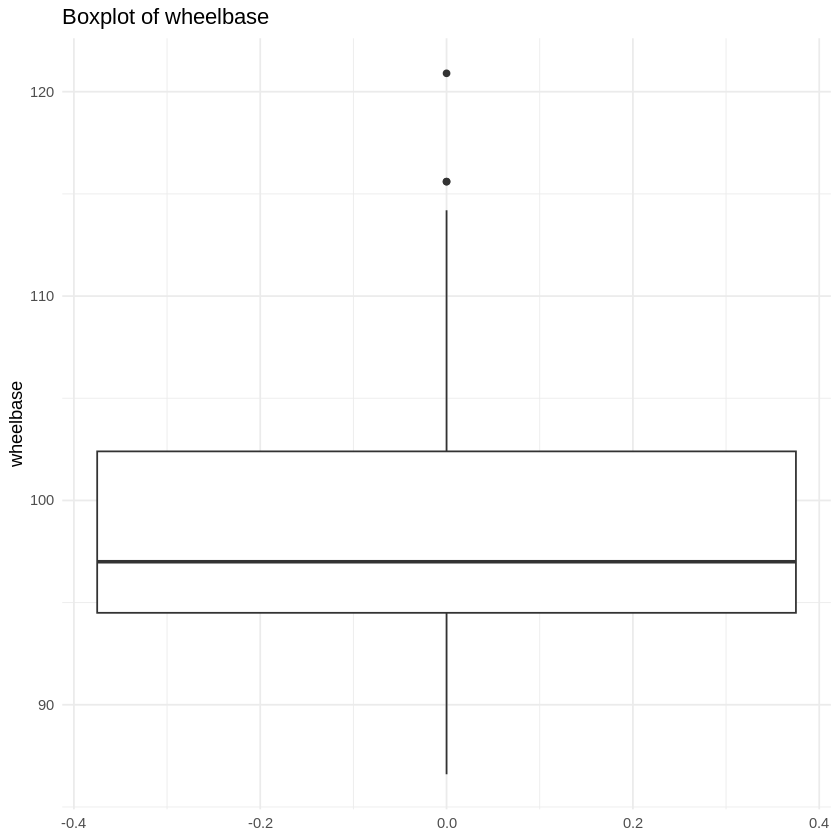

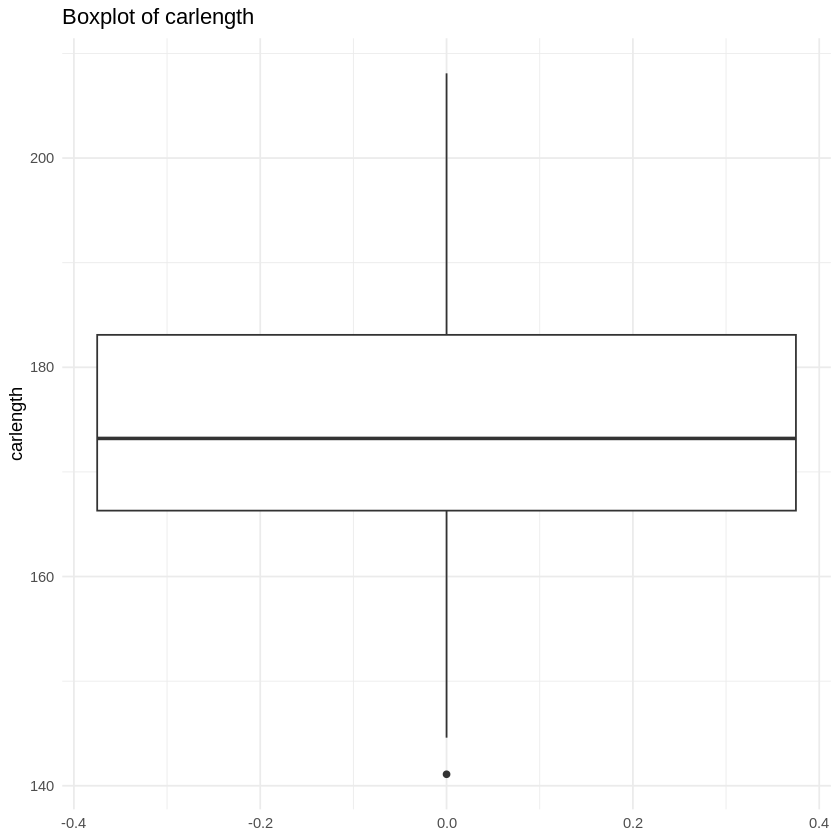

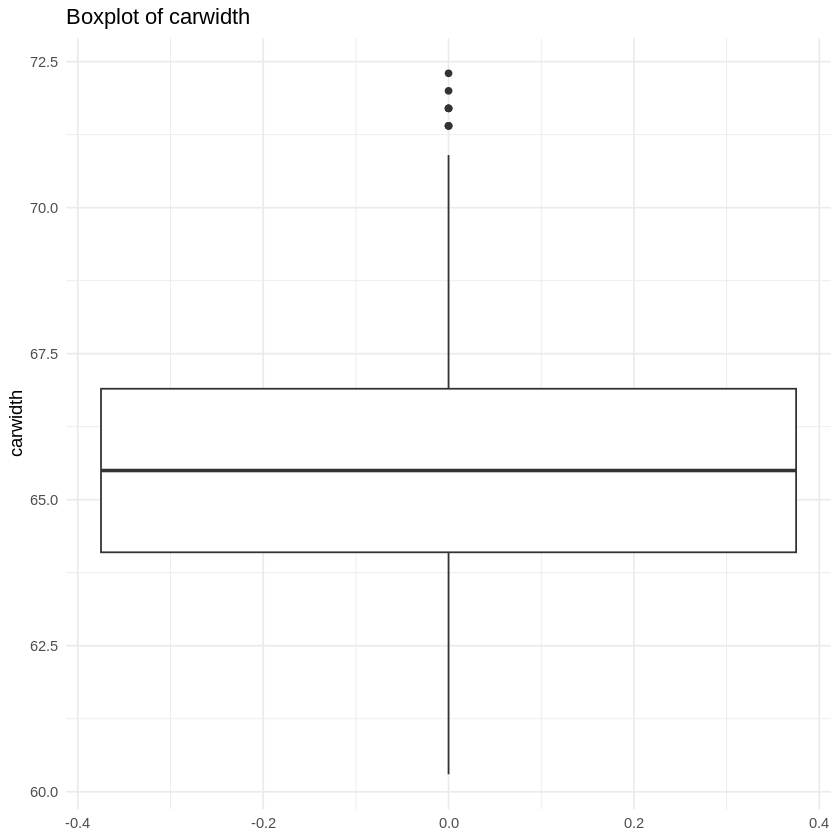

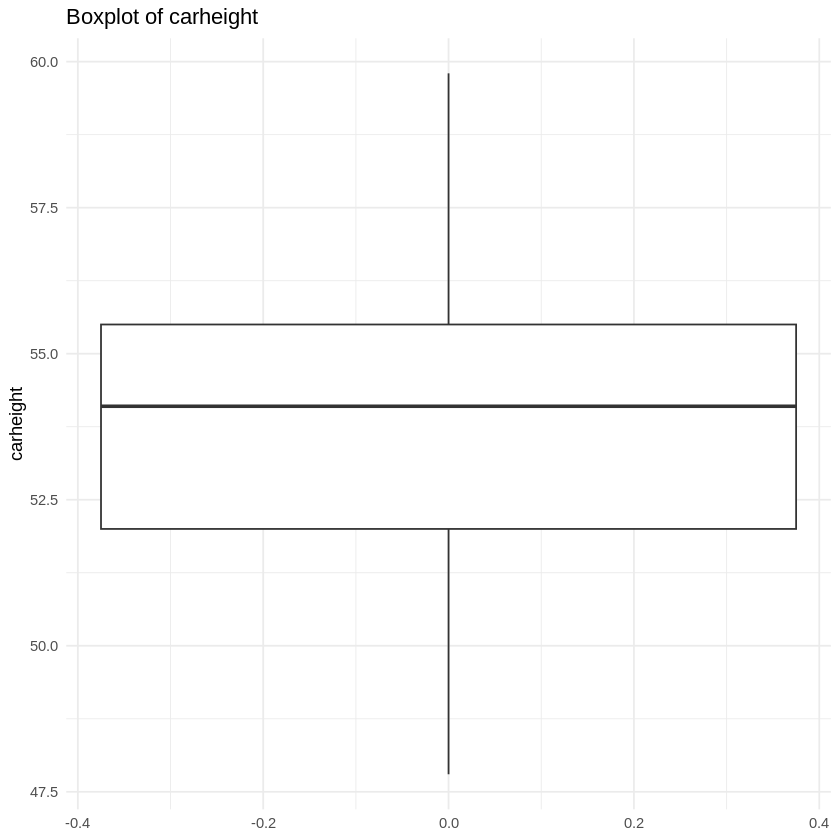

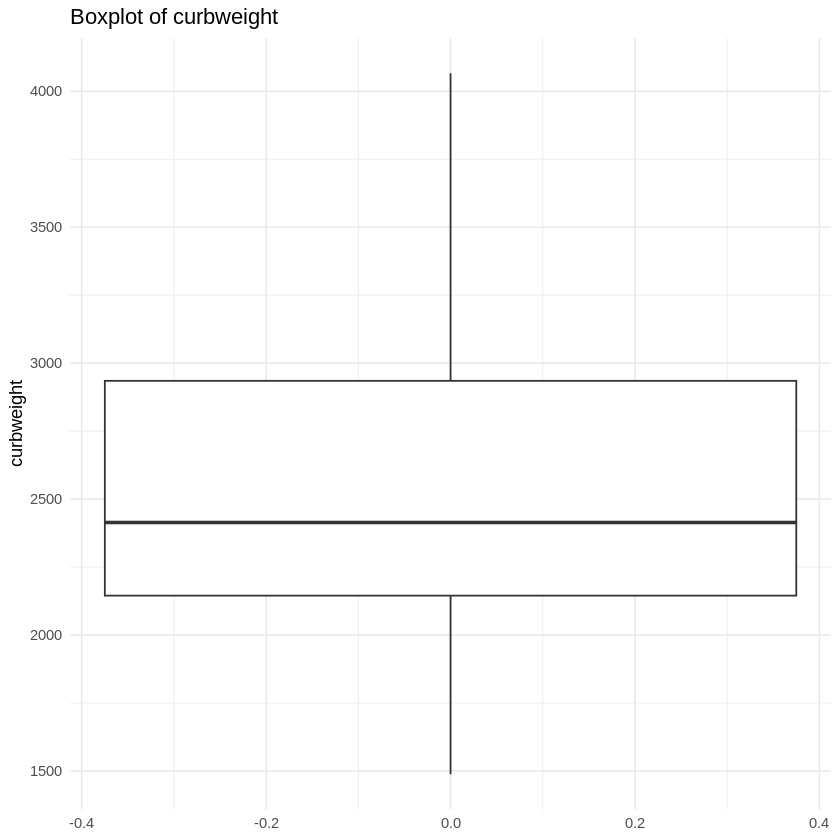

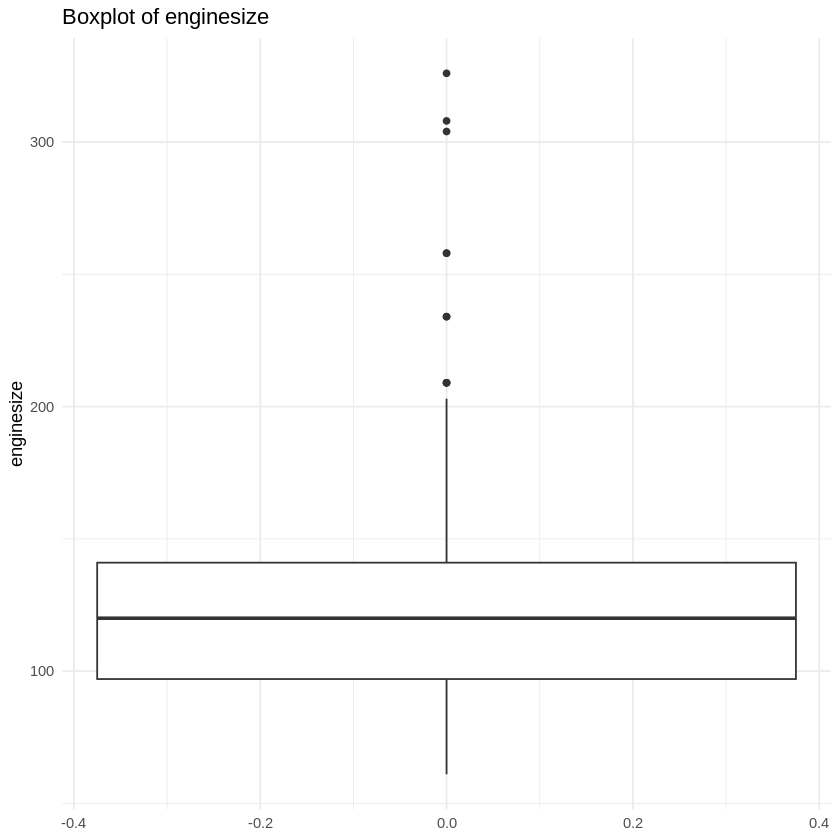

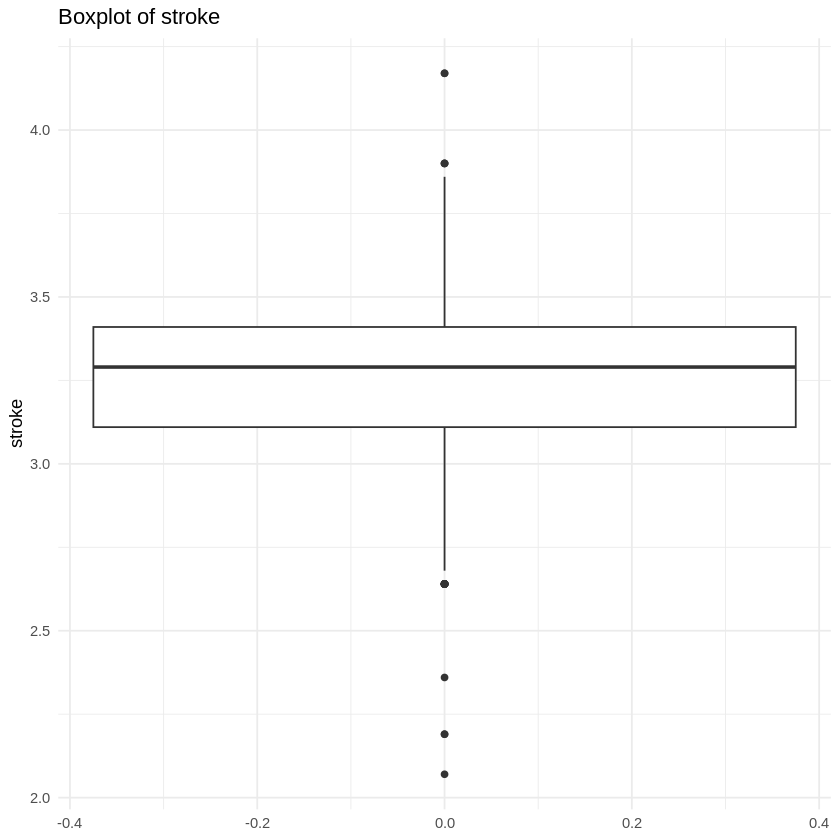

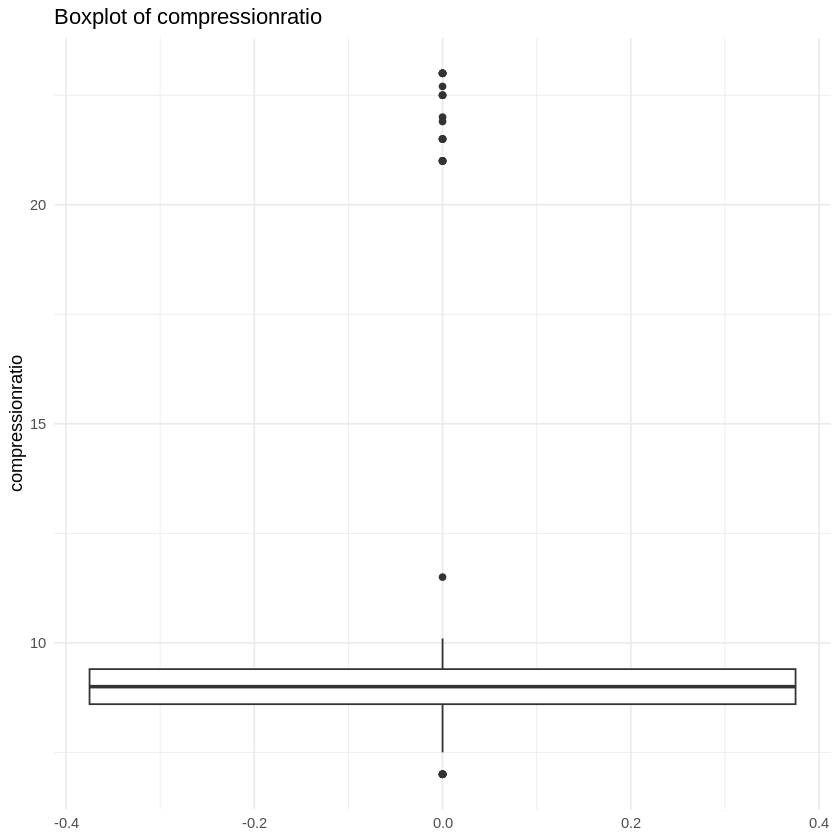

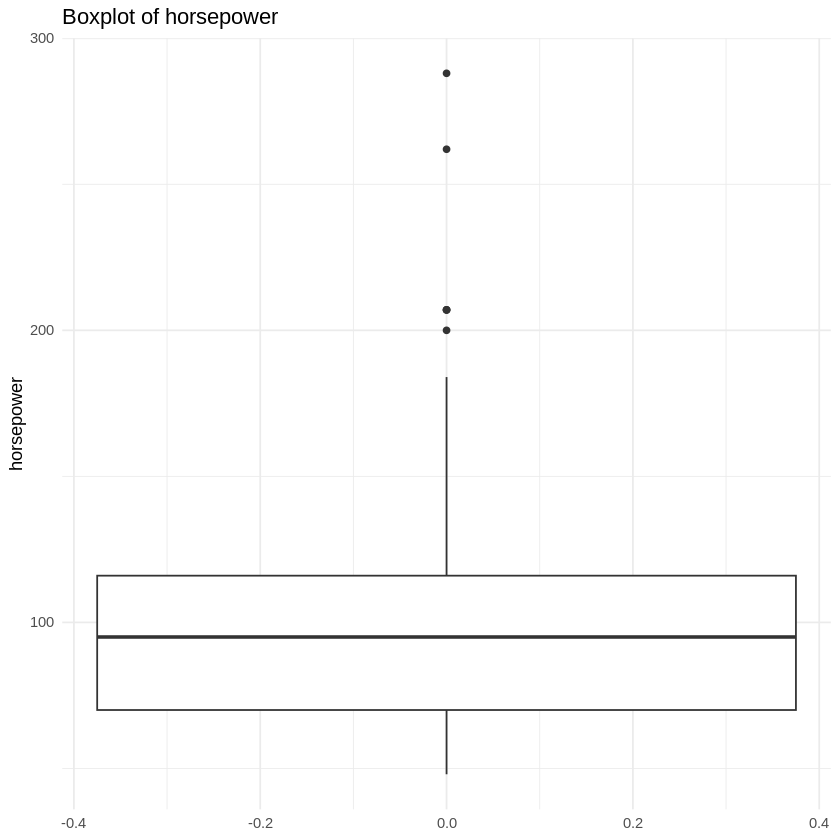

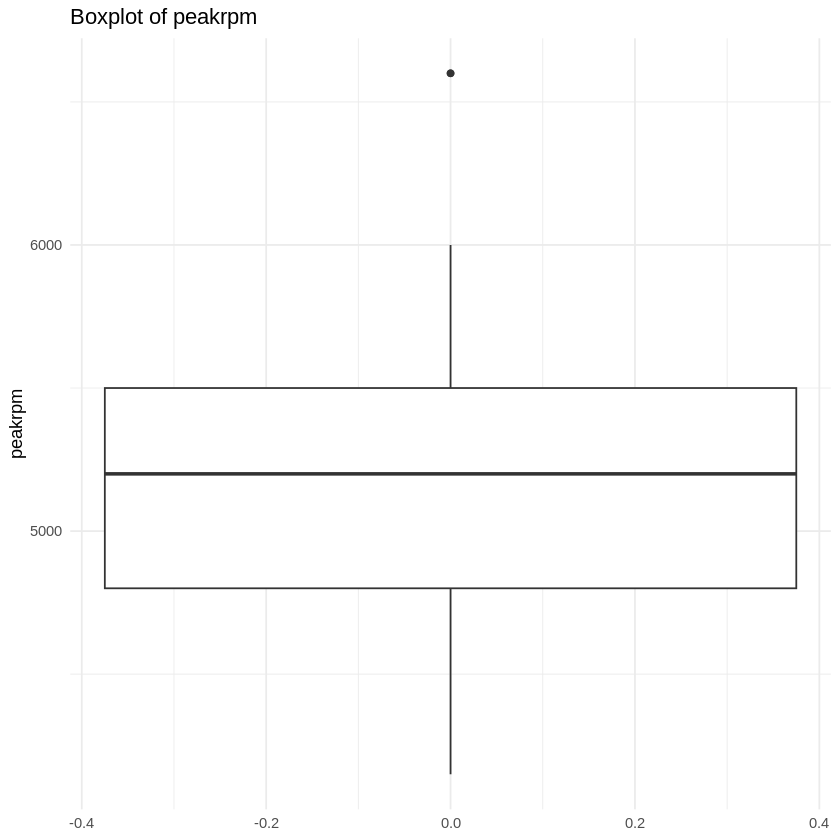

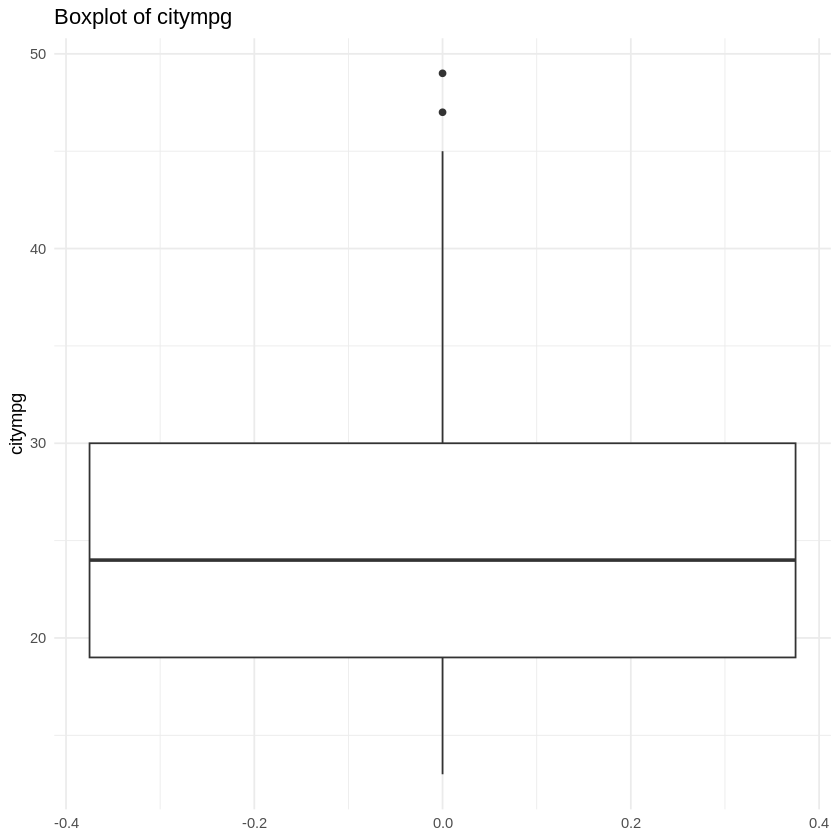

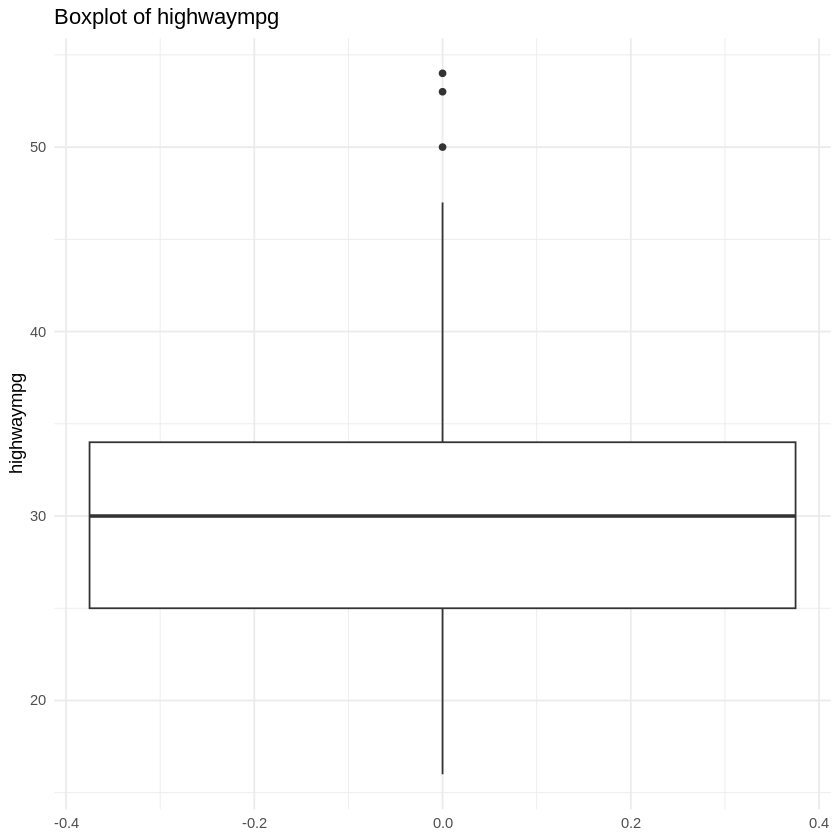

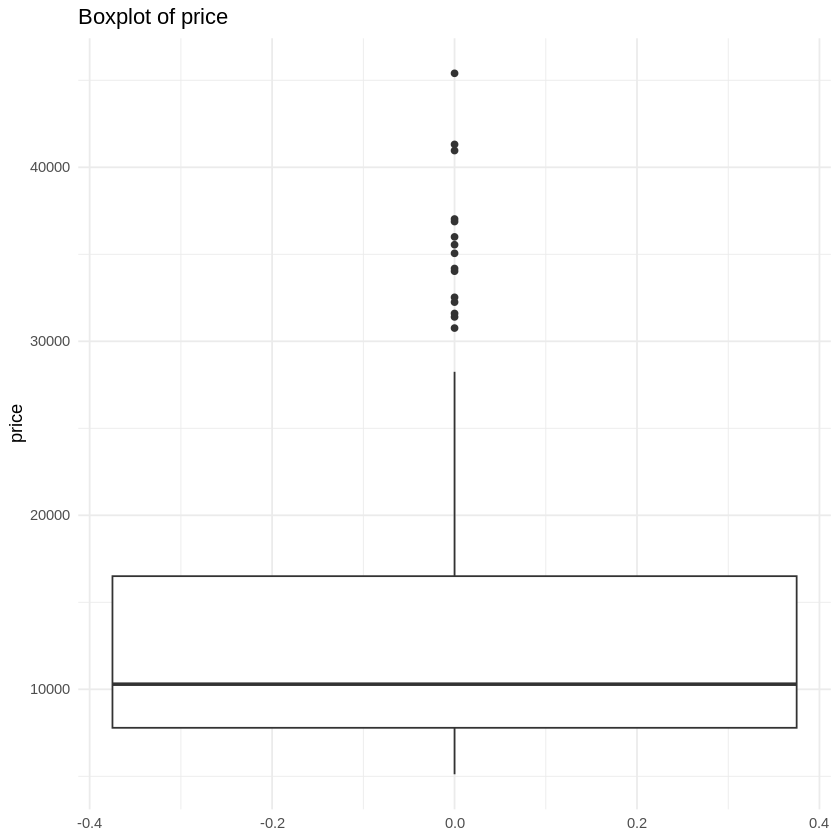

In [ ]:
# Boxplots para variables numericas

# Cargar la biblioteca necesaria para hacer gráficos
library(ggplot2)

# Crear una función para generar y mostrar boxplots para cada variable
generate_boxplots <- function(data) {
  # Iterar sobre cada columna numérica
  for (col in numeric_vars) {
    # Crear un objeto de gráfico de ggplot con un boxplot
    p <- ggplot(data, aes(y = .data[[col]])) +
      geom_boxplot() +                     # Agregar el geom para el boxplot
      labs(title = paste("Boxplot of", col),  # Asignar título al gráfico
           y = col) +                          # Etiqueta del eje Y
      theme_minimal()                      # Aplicar un tema minimalista al gráfico

    print(p)  # Mostrar el gráfico
  }
}

# Llamar a la función para generar y mostrar los boxplots
generate_boxplots(data)


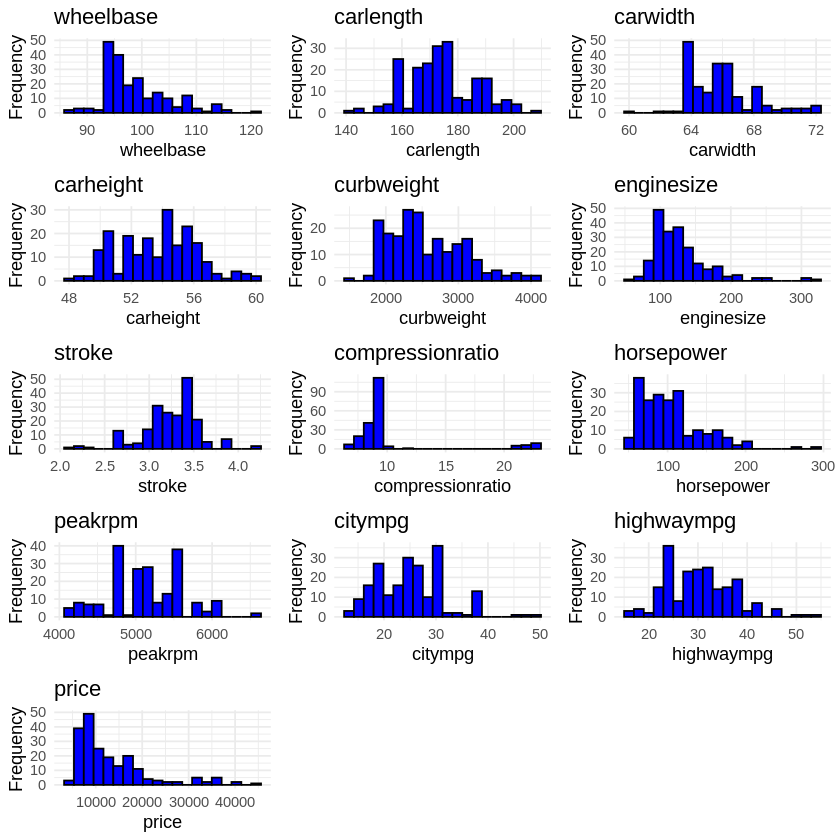

In [ ]:
#Histogramas de frecuencia por rangos de variables numericas

# Cargar las bibliotecas necesarias para hacer gráficos y organizar
library(ggplot2)
library(gridExtra)

# Crear una función para generar histogramas por rangos para cada variable
generate_histograms_by_ranges <- function(data) {
  # Crear una lista para almacenar los gráficos generados
  plots <- list()

  # Iterar sobre cada columna numérica
  for (col in numeric_vars) {
    # Crear un objeto de gráfico de ggplot con un histograma
    p <- ggplot(data, aes(x = .data[[col]])) +
      geom_histogram(binwidth = NULL, bins = 20, fill = "blue", color = "black") +
      labs(title = paste(col),  # Asignar título al gráfico
           x = col,              # Etiqueta del eje X
           y = "Frequency") +    # Etiqueta del eje Y
      theme_minimal()            # Aplicar un tema minimalista al gráfico
    plots[[col]] <- p  # Agregar el gráfico a la lista 'plots' bajo el nombre de la columna actual
  }

  grid.arrange(grobs = plots, ncol = 3)  # Organizar y mostrar los gráficos en una matriz (3 columnas en este caso)
}

# Llamar a la función para generar y organizar los histogramas por rangos en una matriz
generate_histograms_by_ranges(data)

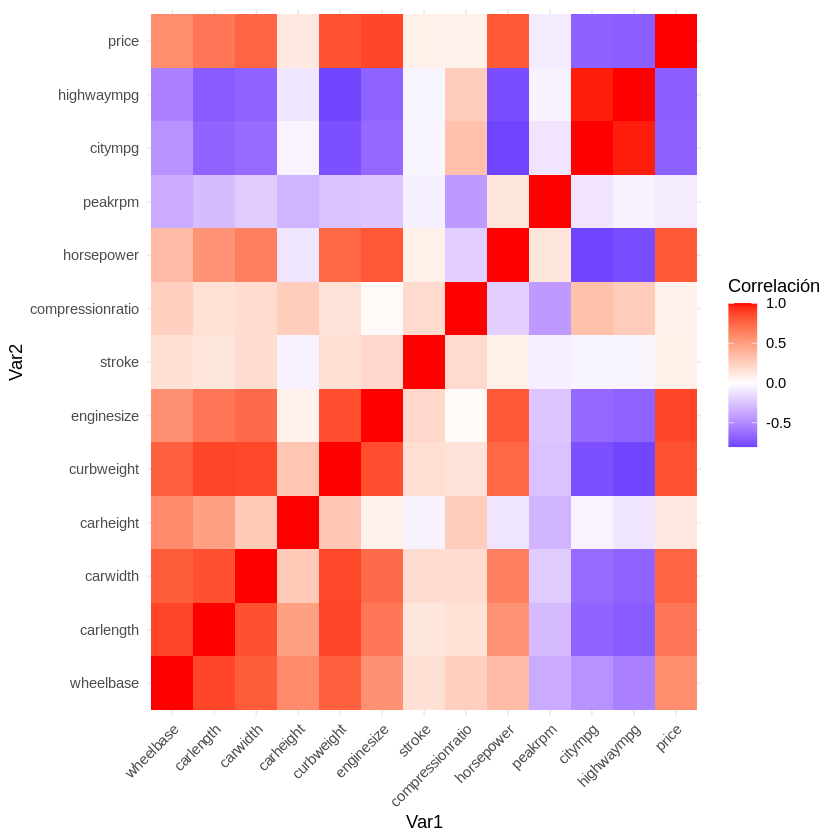

In [ ]:
# Matriz de correlacion de variables numericas

# Calcular los coeficientes de correlación
correlation_matrix <- cor(data[, numeric_vars])

# Cargar las bibliotecas necesarias para hacer gráficos
library(ggplot2)
library(reshape2)

# Convertir la matriz de correlación al formato largo
correlation_long <- melt(correlation_matrix)

# Crear un mapa de calor para la matriz de correlación
heatmap_plot <- ggplot(correlation_long, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0,
                       name = "Correlación") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Mostrar el mapa de calor
print(heatmap_plot)



2. Variables categóricas:
- Distribución de los datos (diagramas de barras, diagramas de pastel)
- Analiza asociación o colinealidad (diagramas de caja y bigote de precio por categoría y barras por categoría)

Warning message in split.default(X, group):
“data length is not a multiple of split variable”
Warning message in split.default(X, group):
“data length is not a multiple of split variable”
Warning message in split.default(X, group):
“data length is not a multiple of split variable”
Warning message in split.default(X, group):
“data length is not a multiple of split variable”


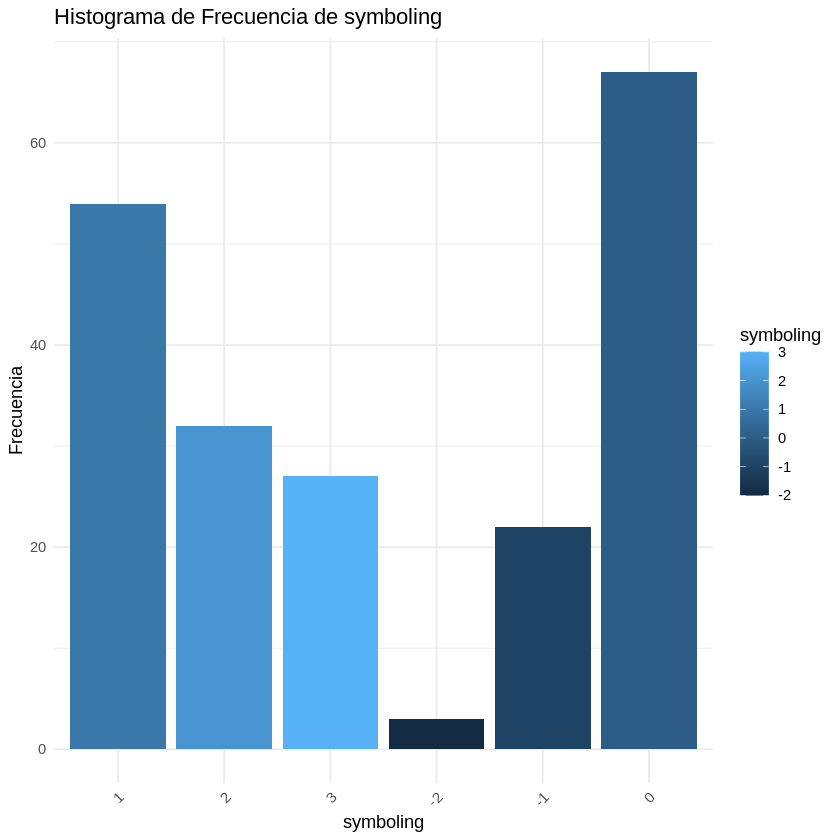

Warning message in split.default(X, group):
“data length is not a multiple of split variable”
Warning message in split.default(X, group):
“data length is not a multiple of split variable”


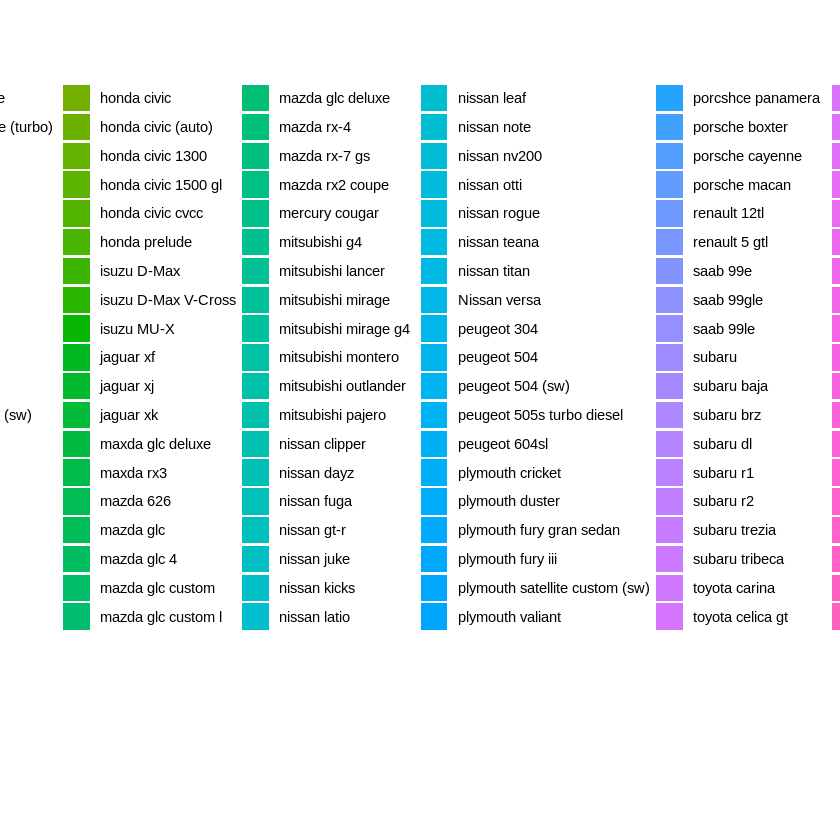

Warning message in split.default(X, group):
“data length is not a multiple of split variable”
Warning message in split.default(X, group):
“data length is not a multiple of split variable”


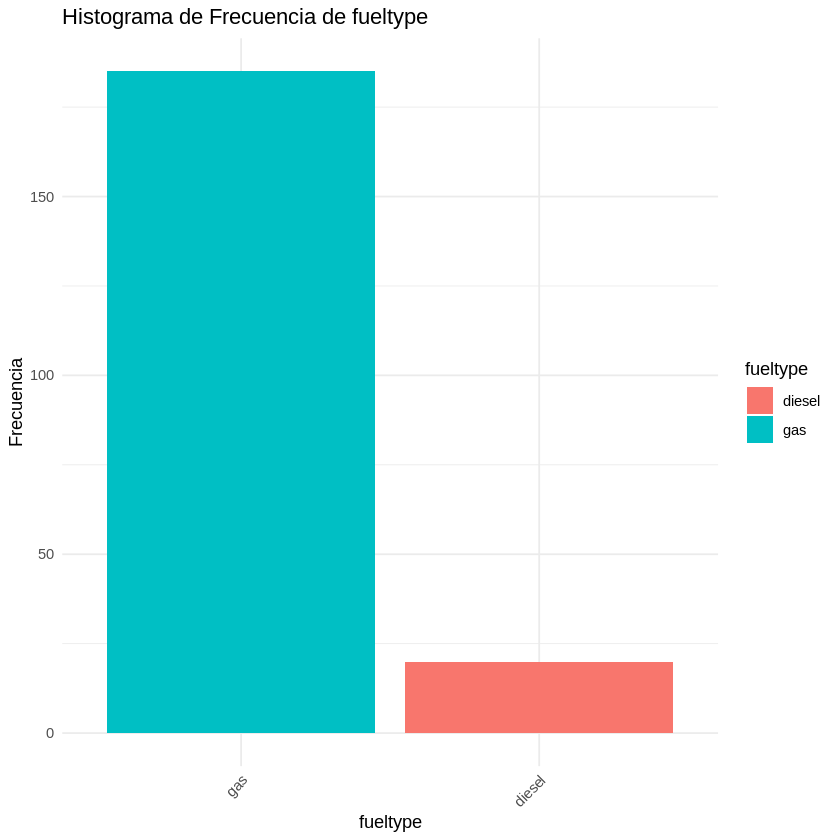

Warning message in split.default(X, group):
“data length is not a multiple of split variable”
Warning message in split.default(X, group):
“data length is not a multiple of split variable”


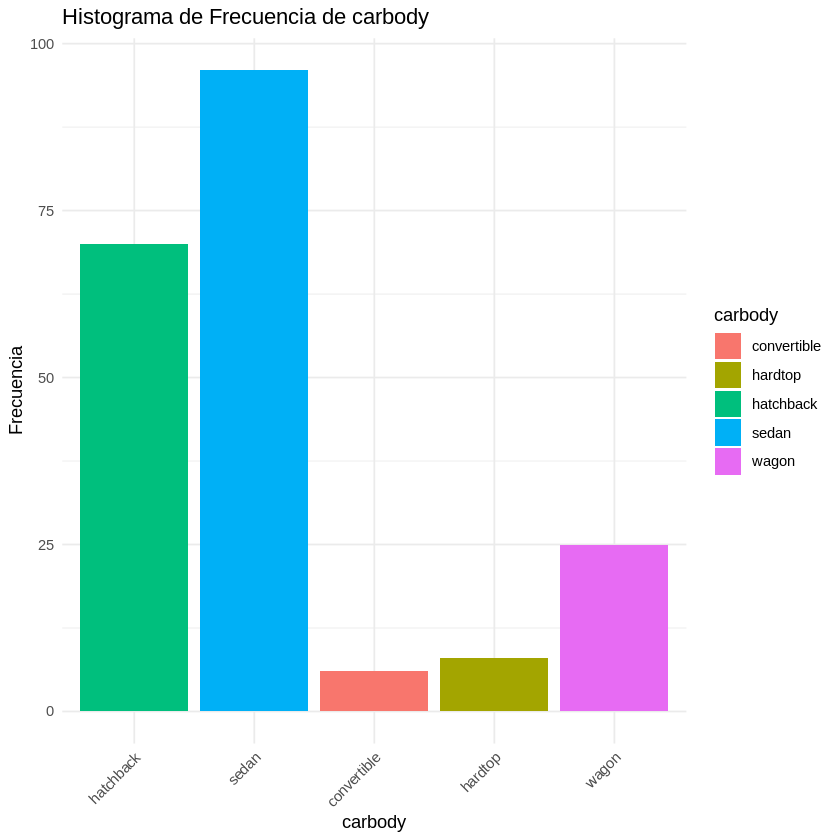

Warning message in split.default(X, group):
“data length is not a multiple of split variable”
Warning message in split.default(X, group):
“data length is not a multiple of split variable”


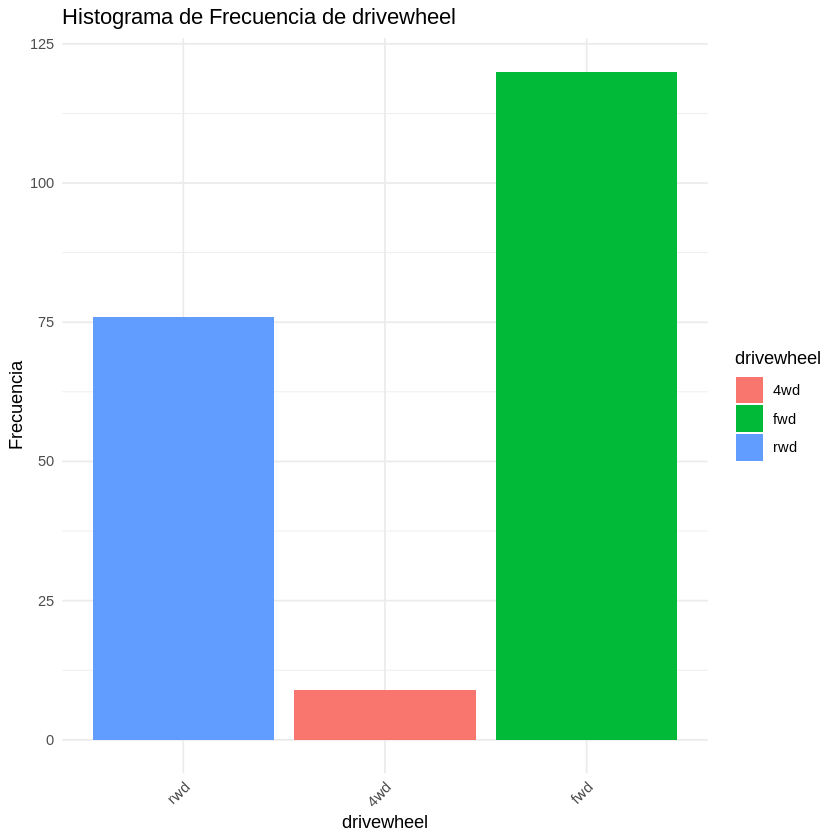

Warning message in split.default(X, group):
“data length is not a multiple of split variable”
Warning message in split.default(X, group):
“data length is not a multiple of split variable”


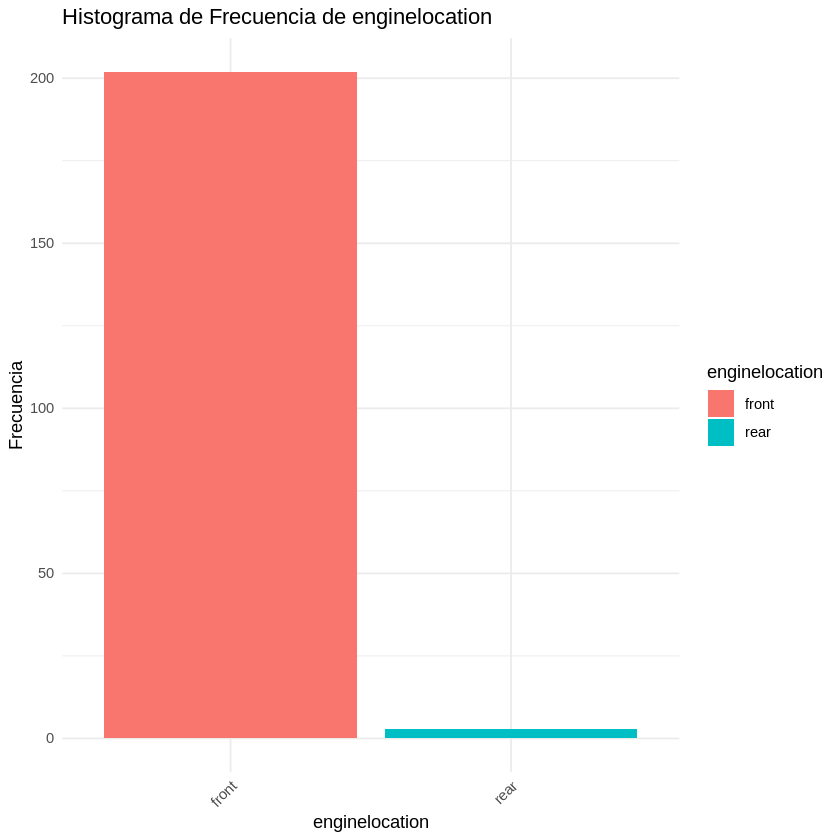

Warning message in split.default(X, group):
“data length is not a multiple of split variable”
Warning message in split.default(X, group):
“data length is not a multiple of split variable”


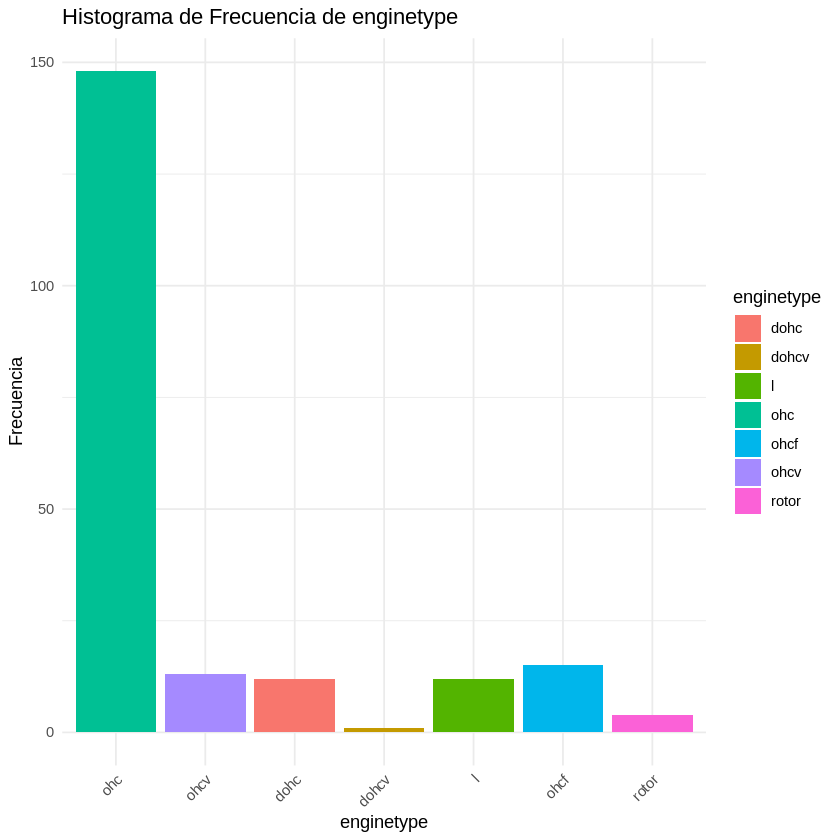

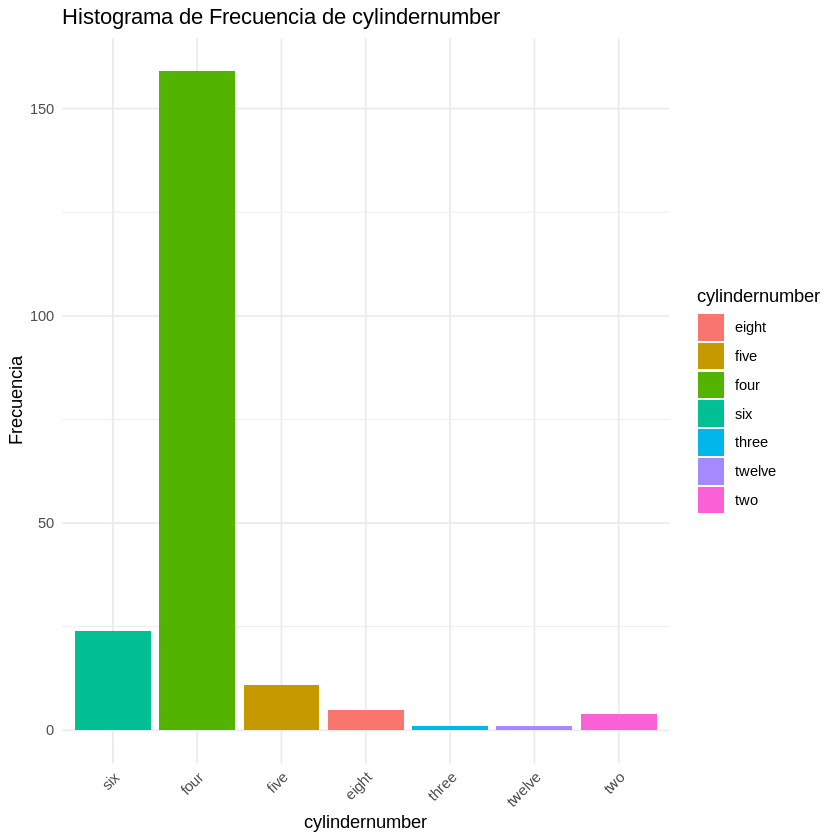

In [ ]:
# Histograma para distribución de frecuencias para variables categoricas

# Iterar a través de cada variable y crear un histograma de frecuencia
for (var in categorical_vars) {
  # Crear el gráfico de histograma usando ggplot2
  plot <- ggplot(data, aes(x = reorder(.data[[var]], -table(.data[[var]])), fill = .data[[var]])) +
    geom_bar() +
    labs(title = paste("Histograma de Frecuencia de", var),
         x = var,
         y = "Frecuencia") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

  # Mostrar el gráfico
  print(plot)
}


Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”
Warning message:
“The following aesthetics were dropped during statistical transformation: fill
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


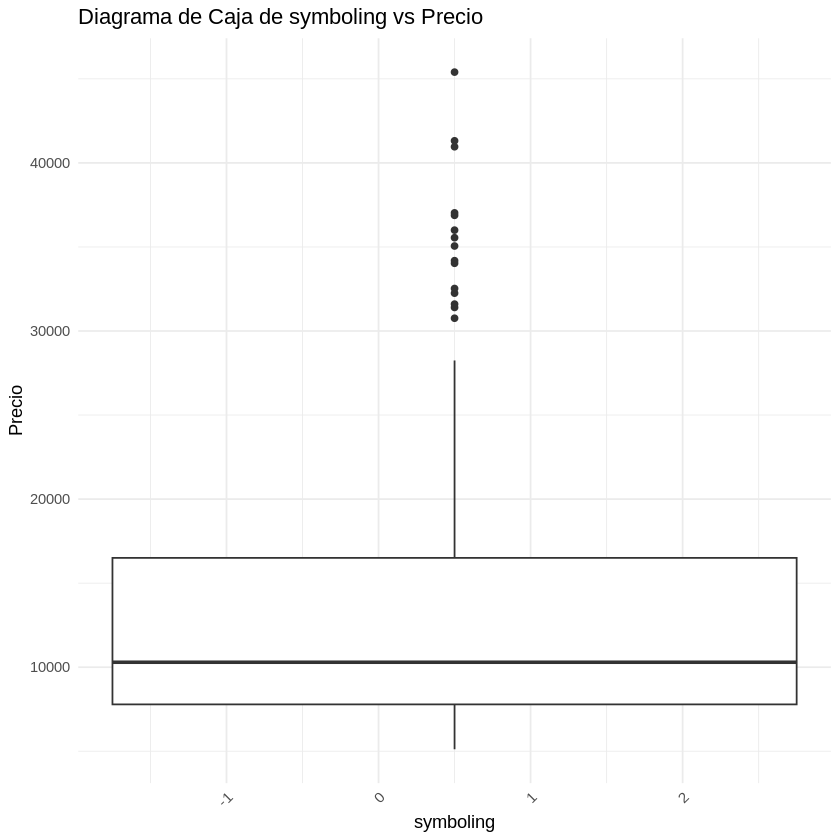

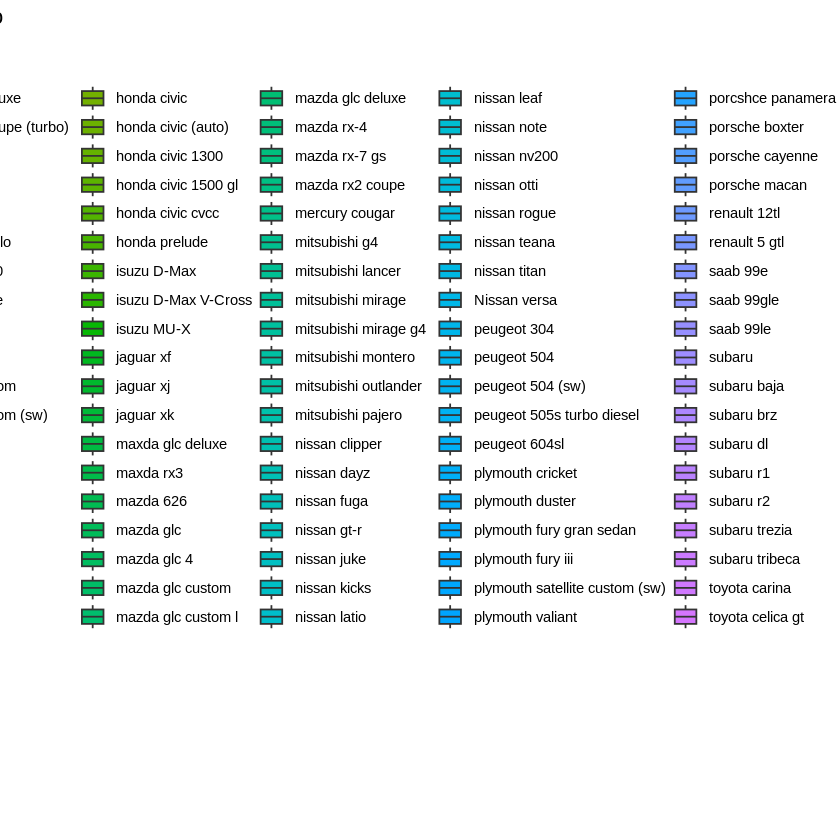

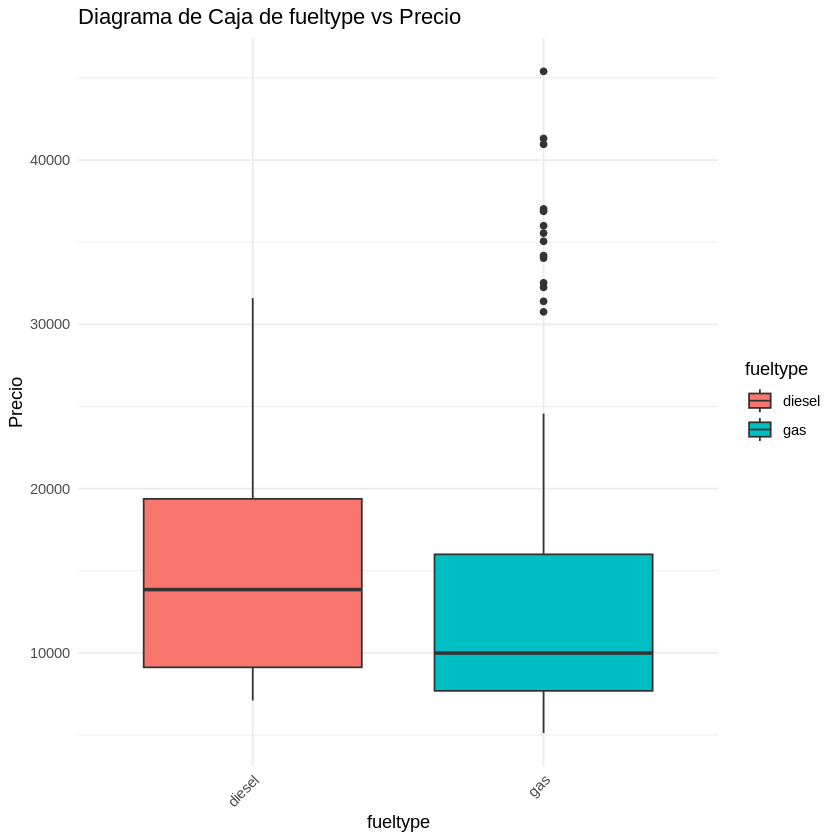

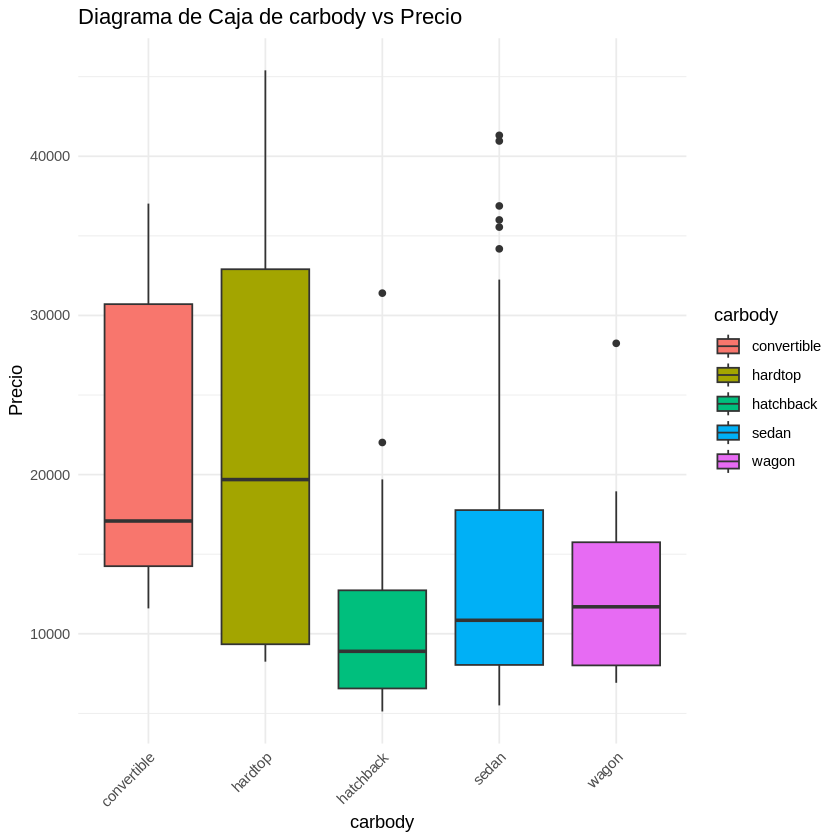

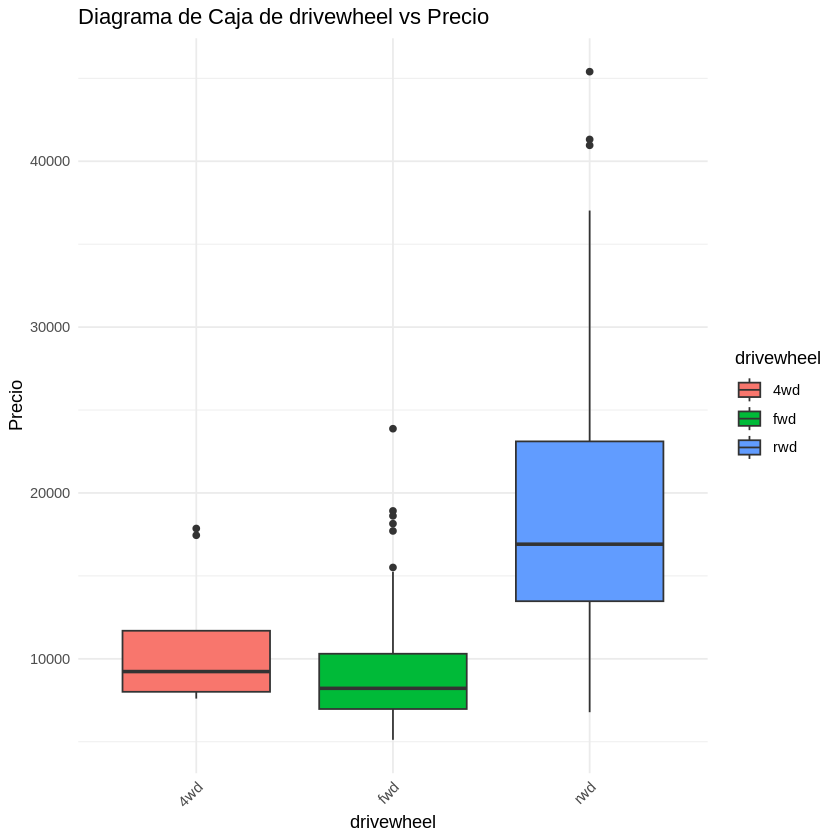

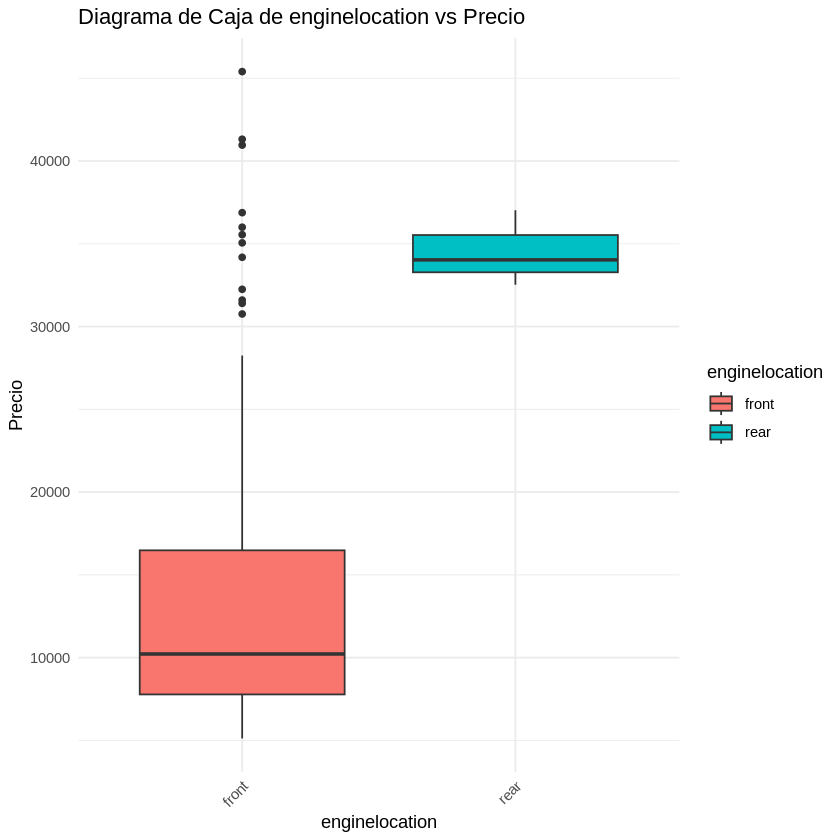

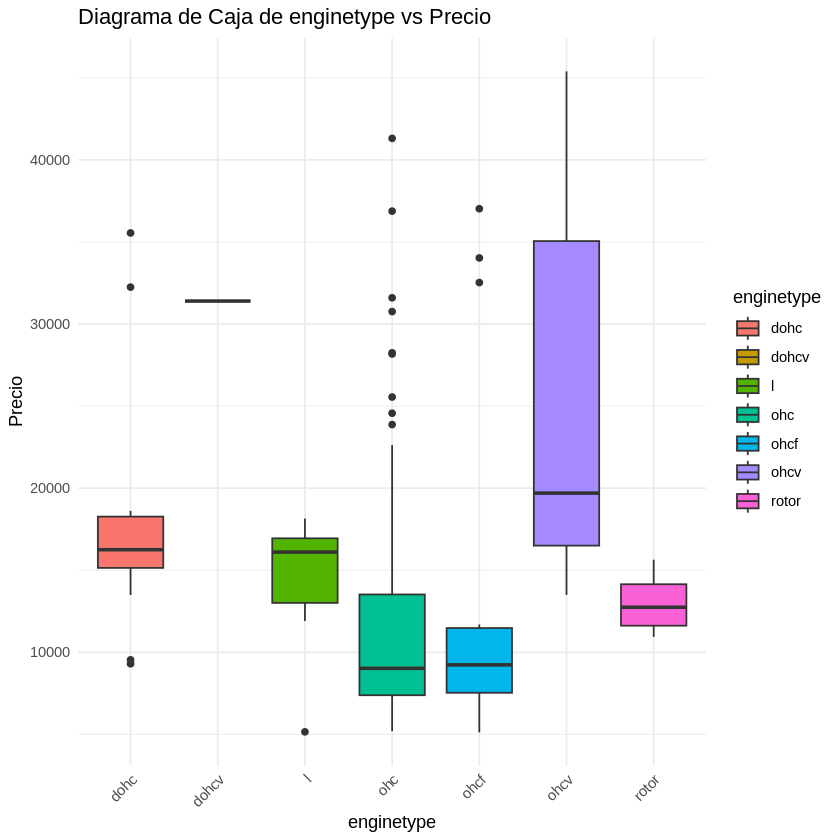

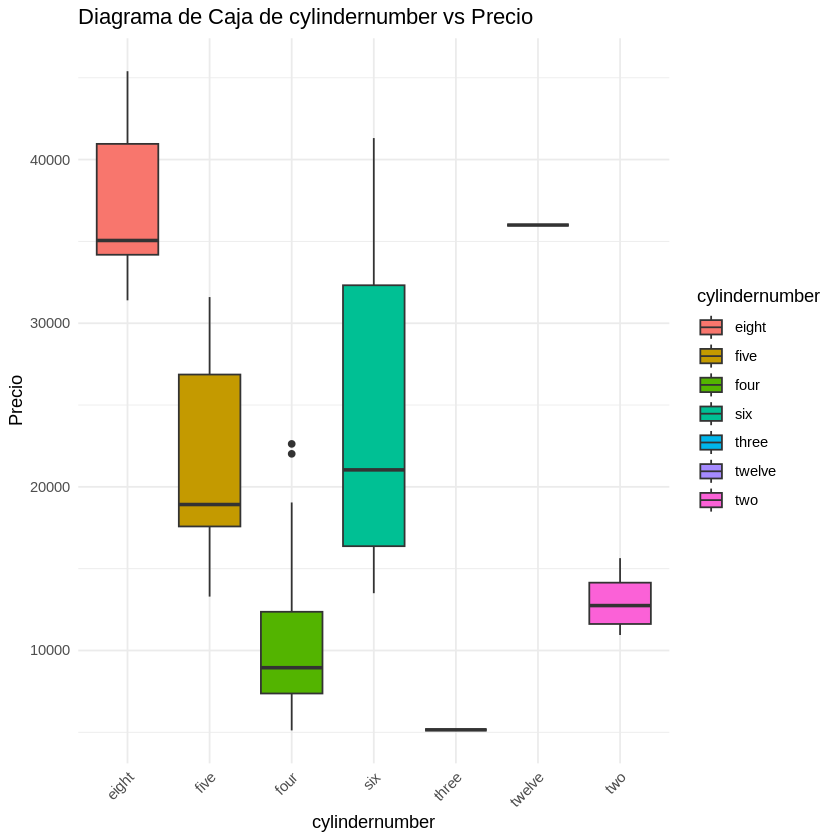

In [ ]:
#Boxplots para comparar cada variable categorica con el precio (variable objetivo)

# Iterar a través de cada variable y crear un diagrama de caja
for (var in categorical_vars) {
  # Crear el diagrama de caja usando ggplot2
  plot <- ggplot(data, aes(x = .data[[var]], y = price, fill = .data[[var]])) +
    geom_boxplot() +
    labs(title = paste("Diagrama de Caja de", var, "vs Precio"),
         x = var,
         y = "Precio") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

  # Mostrar el gráfico
  print(plot)
}


#### d) dentificación de problemas de calidad de datos (valores faltantes, outliers, etc)

*- Identificación de Valores Atípicos:* Mediante el uso de diagramas de caja (boxplots) se ha detecto que las variables **carwidth, enginesize, stroke, horsepower y price** presentan una mayor cantidad de valores atipicos en comparación con el resto de variables lo cual sugiere que estos atributos podrían contener observaciones que se desvían significativamente del comportamiento general de los datos.

*- Evaluación de Sesgo Aparente:* La representación grafica de histogramas ha permitido visualizar el sesgo en ciertas variables. En particular, se observa un sesgo aparente en las variables **wheelbase, enginesize, compressionratio, horsepower y price**. Estos resultados indican que la distribución de datos en estas variables no es simétrica y tiende a inclinarse hacia un extremo, lo que podría tener implicaciones en los análisis posteriores.

*- Identificación de Correlaciones Relevantes:* Mediante el cálculo de la matriz de correlación, se ha destacado un conjunto de variables que muestran una fuerte correlacion con la variable objetivo. Estas variables son: **horsepower, enginesize, curbweight, carwidth, highwaympg y citimpg**. La existencia de correlaciones significativas entre estas características y la variable objetivo sugiere que podrían desempeñar un papel crucial en la predicción o explicación de la variable objetivo.


#### e) Selección de variables importantes para el análisis de las características de los automóviles que determinan su precio

Para la seleccion de las variables a utilzar se tomaron en cuenta la correlacion con la variable objetivo (el precio) para despues pasar a un procesamiento posterior donde se escalen y transformen estas variables para poder ser utilizadas con efectividad.

Para el primer factor se consideran por tanto las siguientes variables: **horsepower, enginesize, curbweight, carwidth, cylindernumber, drivewheel** (estas ultinas dos categoricas en basea su frecuencia y a lo observado en su relacion con la variable price en los boxplot correspondientes).

Posterior a esto, se identifica que en ciertas variables seleccionadas se presentan datos atipipcos importantes y distribuciones no normales lo que podria complicar su posterior utilizacion en un modelo por lo que tendran que ser procesadas mediante metodos de transformacion y escalamiento.

#### f) Preparación de la base de datos

**Seleccion del conjunto de datos a utilizar.**
- Maneja datos categóricos: transforma a variables dummy si es necesario.
- Maneja apropiadamente datos atípicos.

In [ ]:
# Seleccion de columnas
final_data = data[, c("horsepower", "enginesize", "curbweight", "carwidth", "cylindernumber", "drivewheel", "price")]

Transforma los datos en caso necesario.
- Revisa si es necesario discretizar los datos
- Revisa si es necesario escalar y normalizar los datos

**Eliminando datos atipicos de las variable numericas seleccionadas**

El proceso de eliminacion de datos atipicos se llevo a cabo bajo las suigentes consideraciones:
  1. Se identifico que de no llevarse a cabo la eliminacion de datos atipicos los resultados del modelo de regresion no eran optimos, por lo que despues de varias iteraciones se logró mejorar los indiccadores de validez del modelo que se presenta en las siguientes celdas.
  2. Despues de distintas iteraciones se encontró que al eliminar valores extremos con poca o nula frecuencia dentro del data set, el proceso de transformacion presentaba mejores resultados como se podra ver en siguientes celdas.

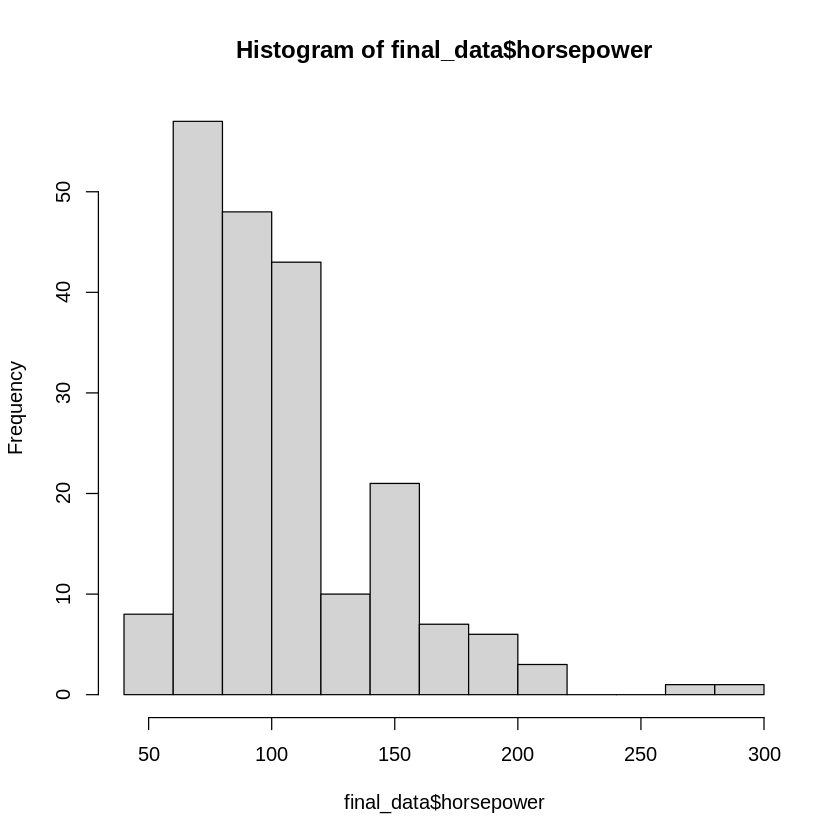

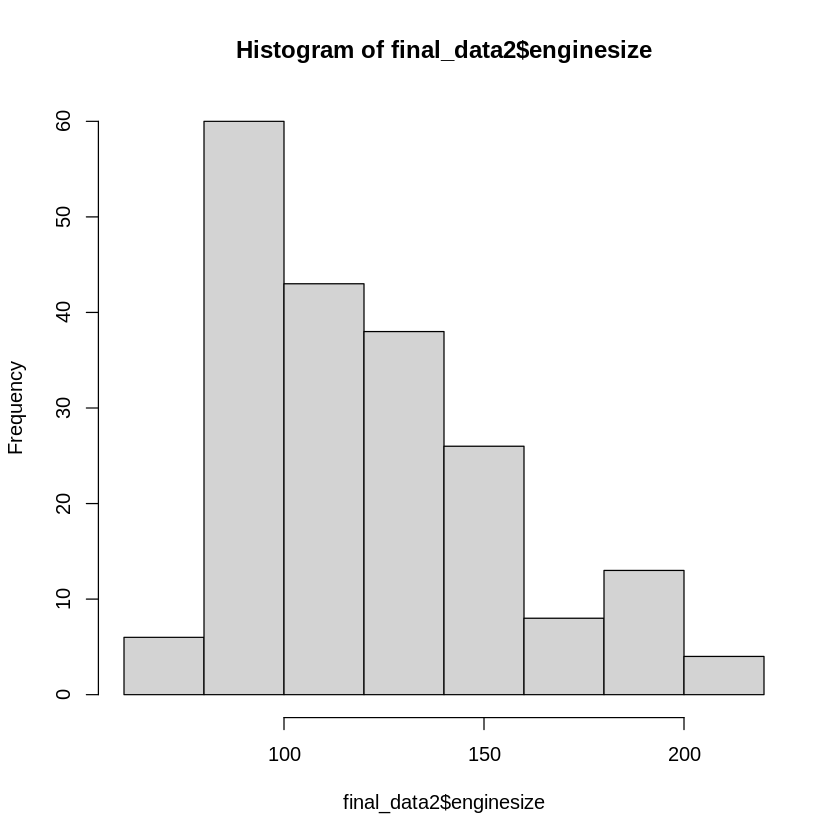

In [ ]:
# eliminando datos atipicos de variable enginesize y mostrando transformacion
hist(final_data$horsepower)
final_data2 = subset(final_data, enginesize != 0)
final_data2 = subset(final_data2, enginesize < 220)
#final_data2 = subset(final_data2, enginesize > 100)
hist(final_data2$enginesize)

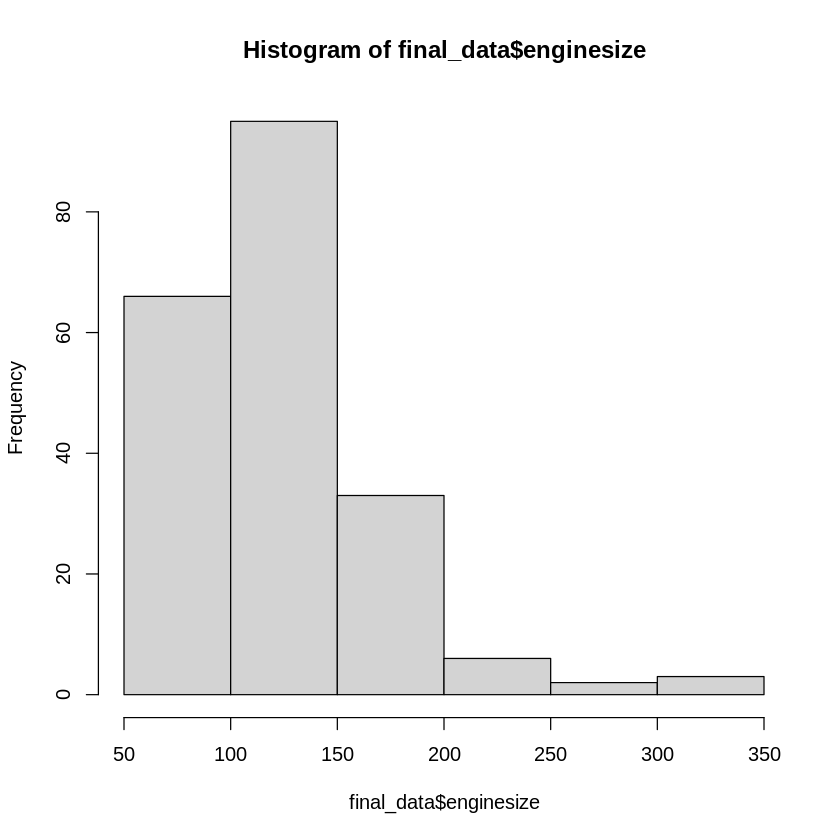

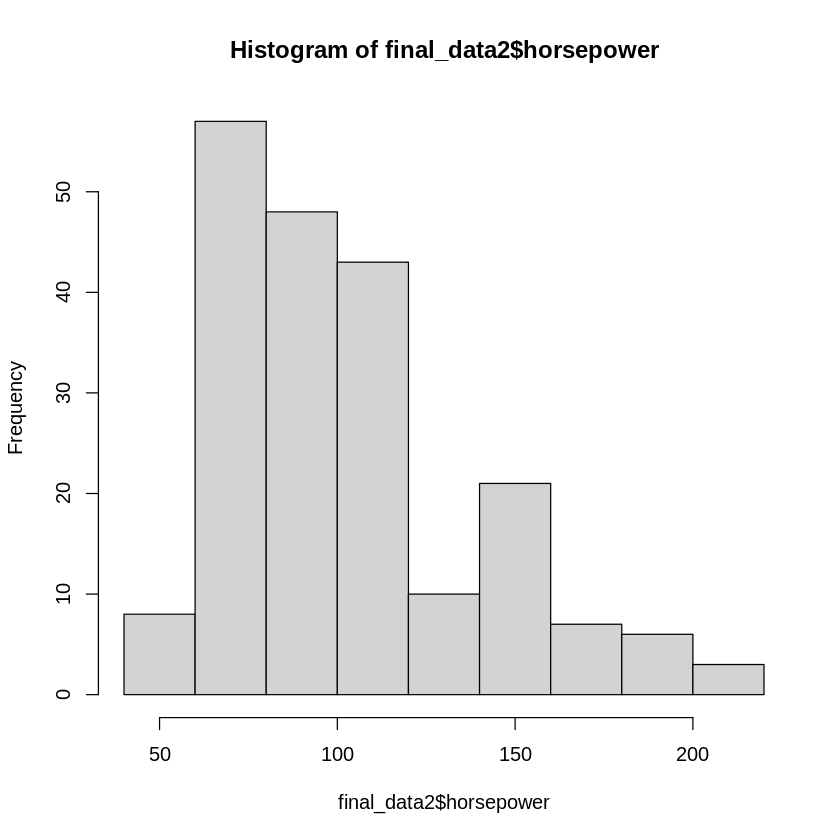

In [ ]:
# eliminando datos atipicos de variable enginesize y mostrando transformacion
hist(final_data$enginesize)
final_data2 = subset(final_data, horsepower != 0)
final_data2 = subset(final_data2, horsepower < 250)
hist(final_data2$horsepower)

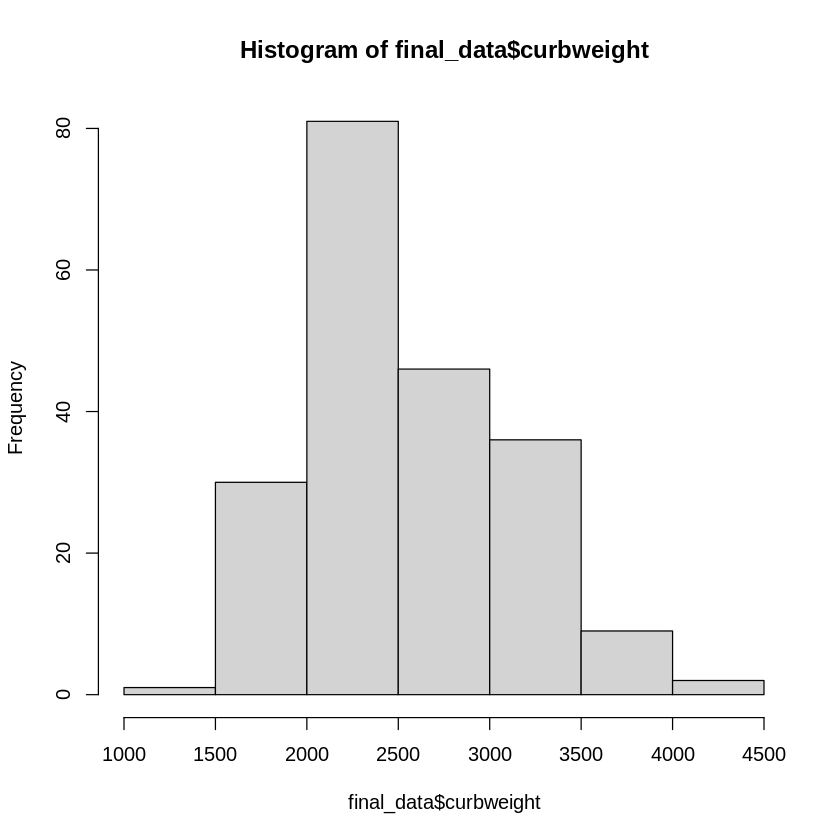

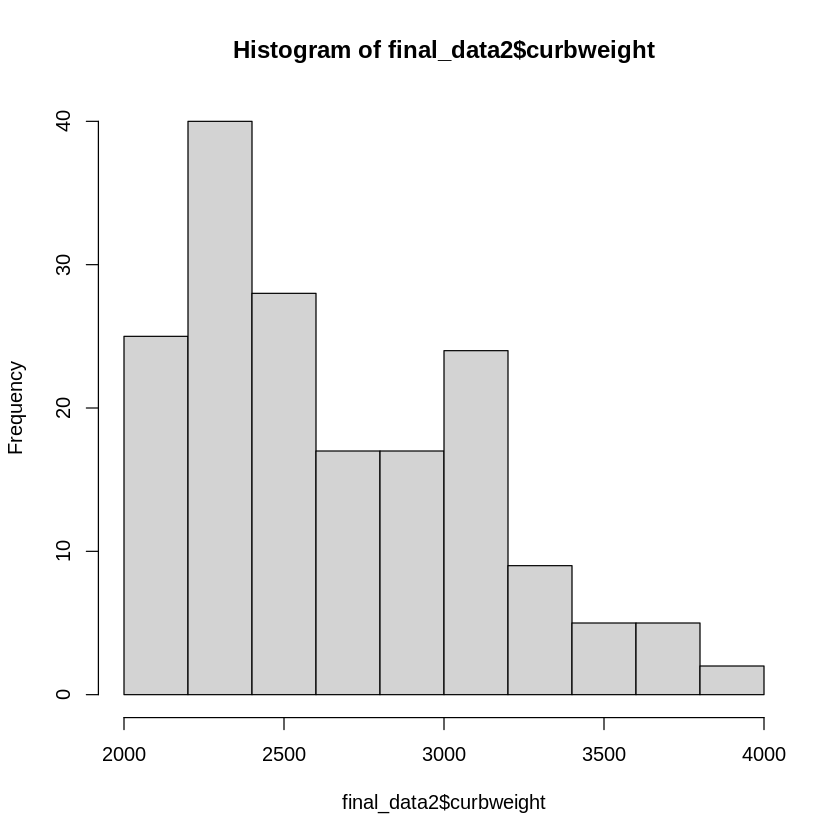

In [ ]:
# eliminando datos atipicos de variable curbweight y mostrando transformacion
hist(final_data$curbweight)
final_data2 = subset(final_data, curbweight != 0)
final_data2 = subset(final_data2, curbweight > 2000)
final_data2 = subset(final_data2, curbweight < 4000)
hist(final_data2$curbweight)

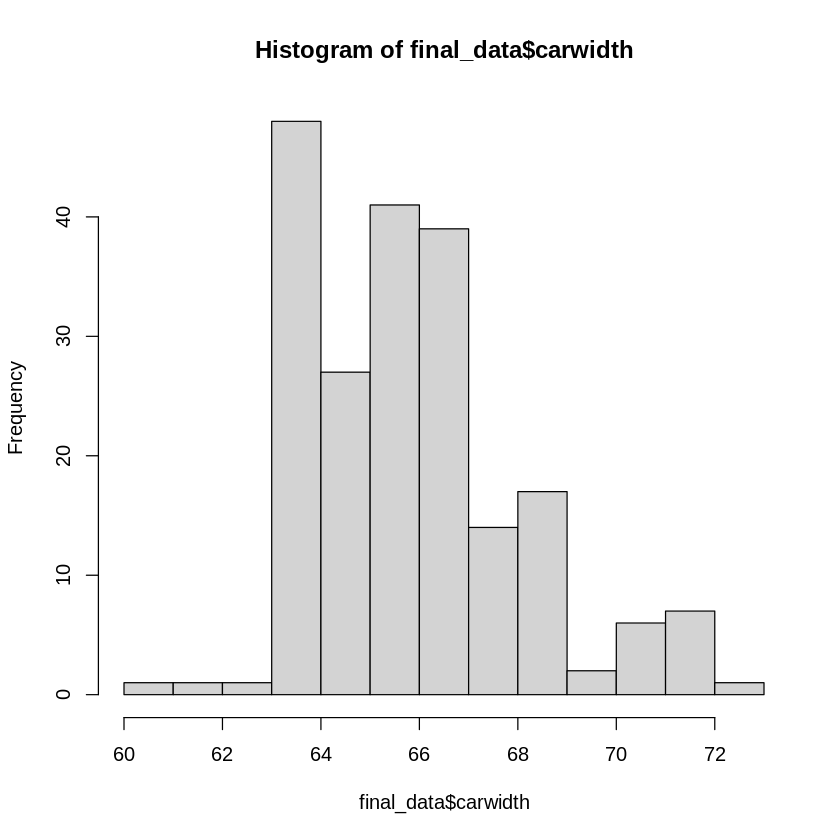

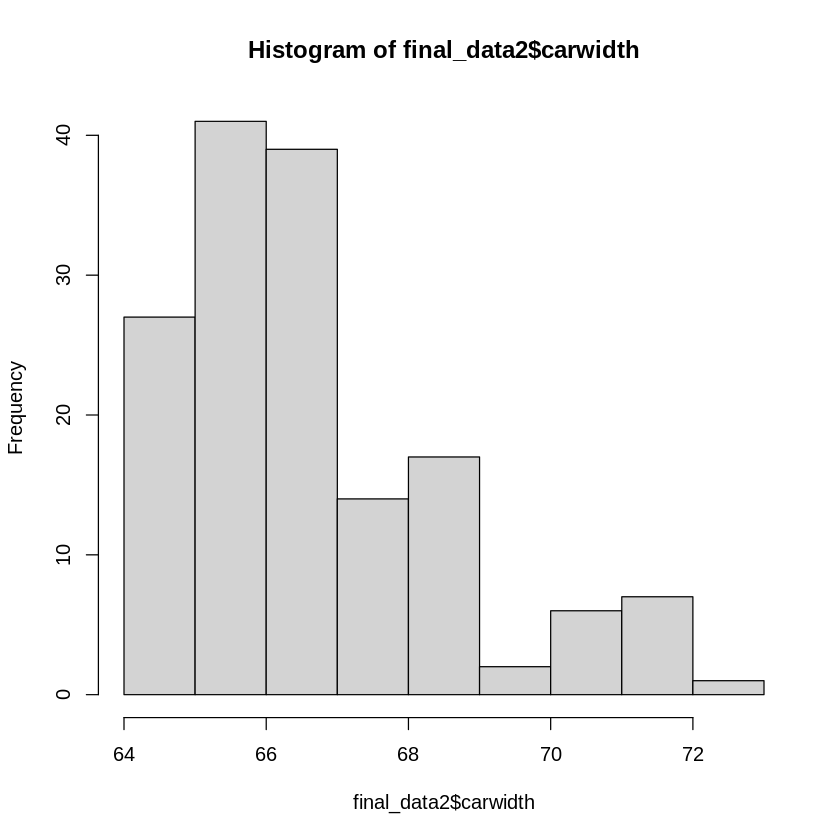

In [ ]:
# eliminando datos atipicos de variable carwidth y mostrando transformacion
hist(final_data$carwidth)
final_data2 = subset(final_data, carwidth != 0)
final_data2 = subset(final_data2, carwidth > 64)

hist(final_data2$carwidth)


**Transformacion de variables numericas**

Dada la naturaleza de los datos y el hecho de que se aplicara un metodo de regresión, se implementa un metodo de transformacion para que las variables horsepower y enginesize tomen un comportamiento mas cercano a una distribucion normal.

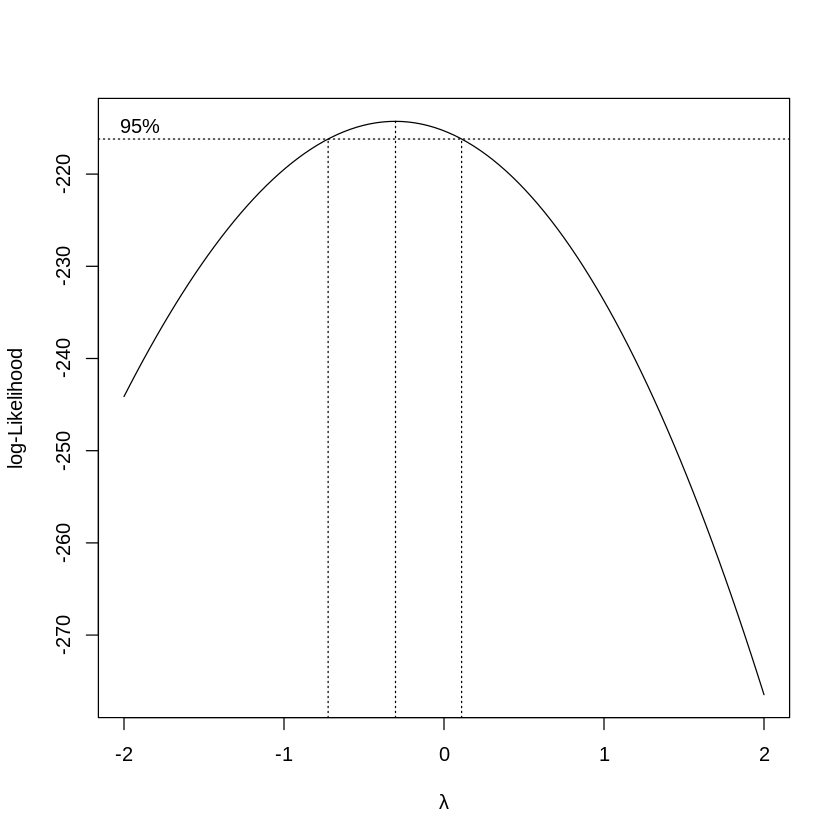

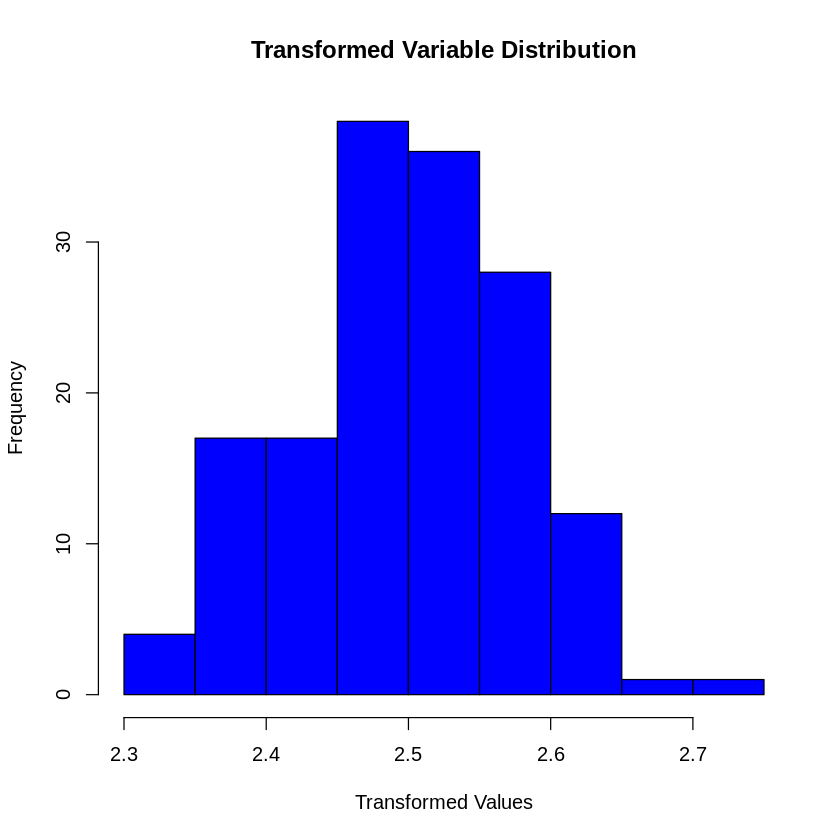

In [ ]:
library(MASS)

horsepower_boxcox <- boxcox(horsepower ~ 1, data = final_data2)
optimal_lambda_horsepower <- horsepower_boxcox$x[which.max(horsepower_boxcox$y)]

final_data2$horsepower <- (final_data2$horsepower^optimal_lambda_horsepower - 1) / optimal_lambda_horsepower

# Assuming 'transformed_response' is your transformed variable
hist(final_data2$horsepower,
     main = "Transformed Variable Distribution",
     xlab = "Transformed Values",
     col = "blue")

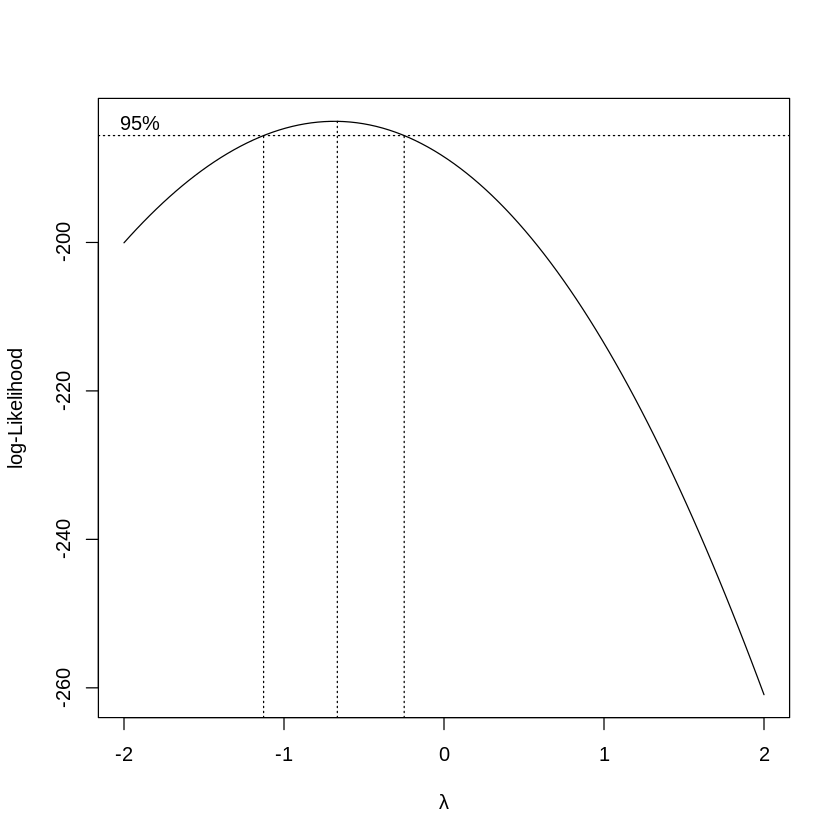

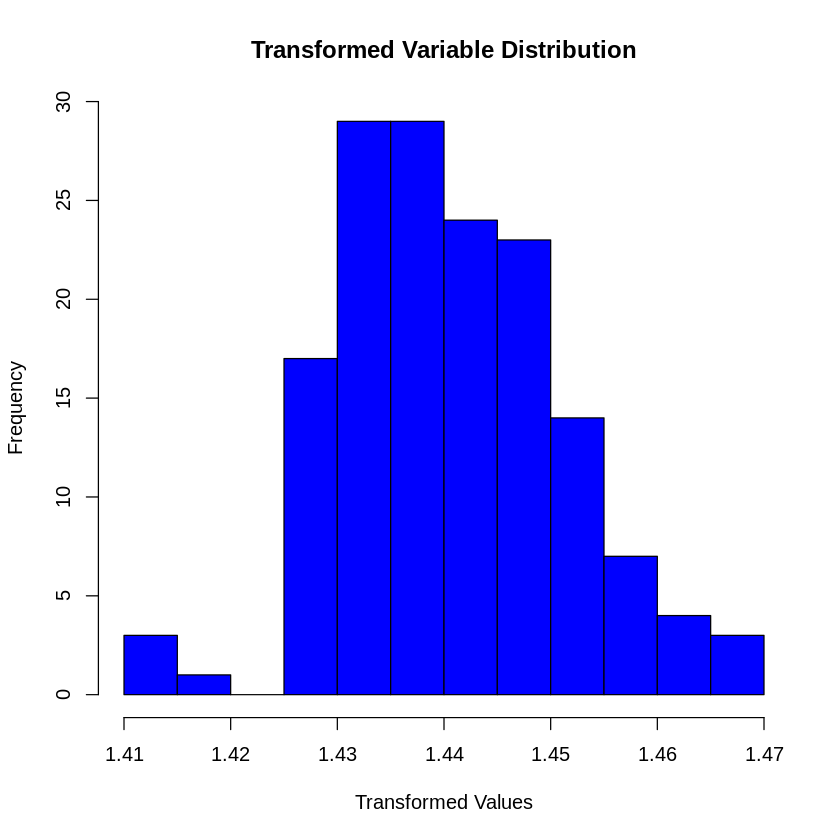

In [ ]:
enginesize_boxcox <- boxcox(enginesize ~ 1, data = final_data2)
optimal_lambda_enginesize <- enginesize_boxcox$x[which.max(enginesize_boxcox$y)]

final_data2$enginesize <- (final_data2$enginesize^optimal_lambda_enginesize - 1) / optimal_lambda_enginesize

# Assuming 'transformed_response' is your transformed variable
hist(final_data2$enginesize,
     main = "Transformed Variable Distribution",
     xlab = "Transformed Values",
     col = "blue")

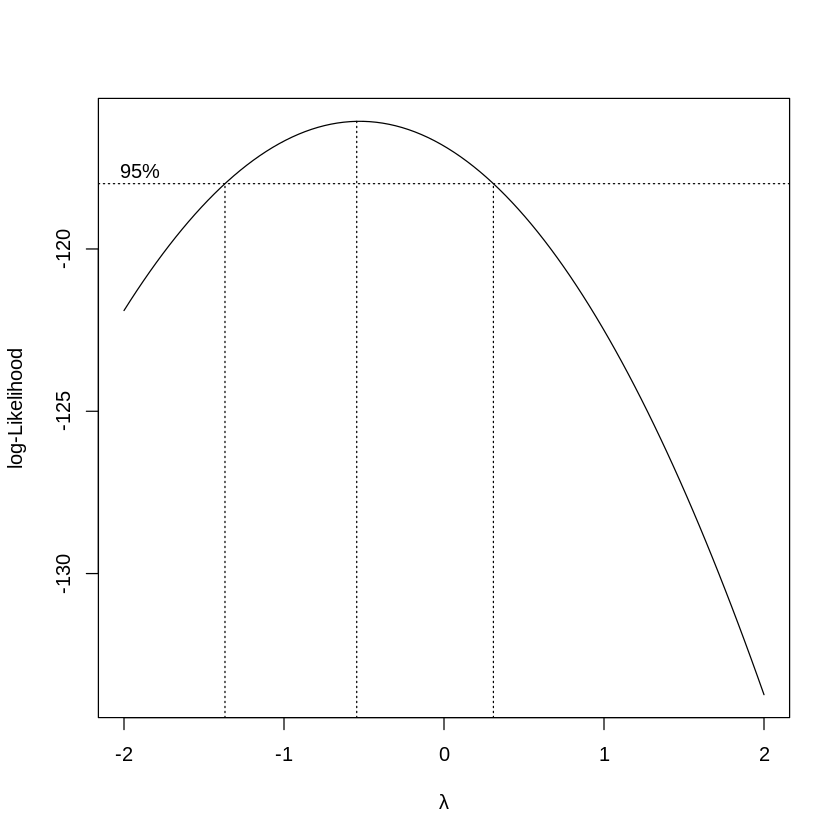

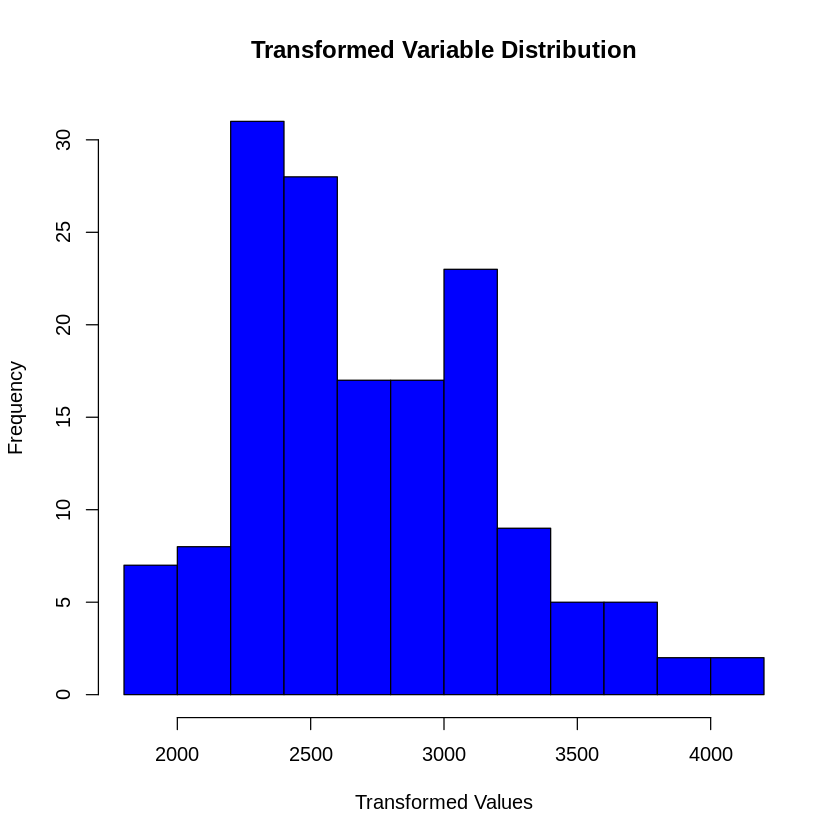

In [ ]:
curbweight_boxcox <- boxcox(curbweight ~ 1, data = final_data2)
optimal_lambda_curbweight <- enginesize_boxcox$x[which.max(enginesize_boxcox$y)]

#final_data2$curbweight <- (final_data2$curbweight^optimal_lambda_curbweight - 1) / optimal_lambda_curbweight

# Assuming 'transformed_response' is your transformed variable
hist(final_data2$curbweight,
     main = "Transformed Variable Distribution",
     xlab = "Transformed Values",
     col = "blue")

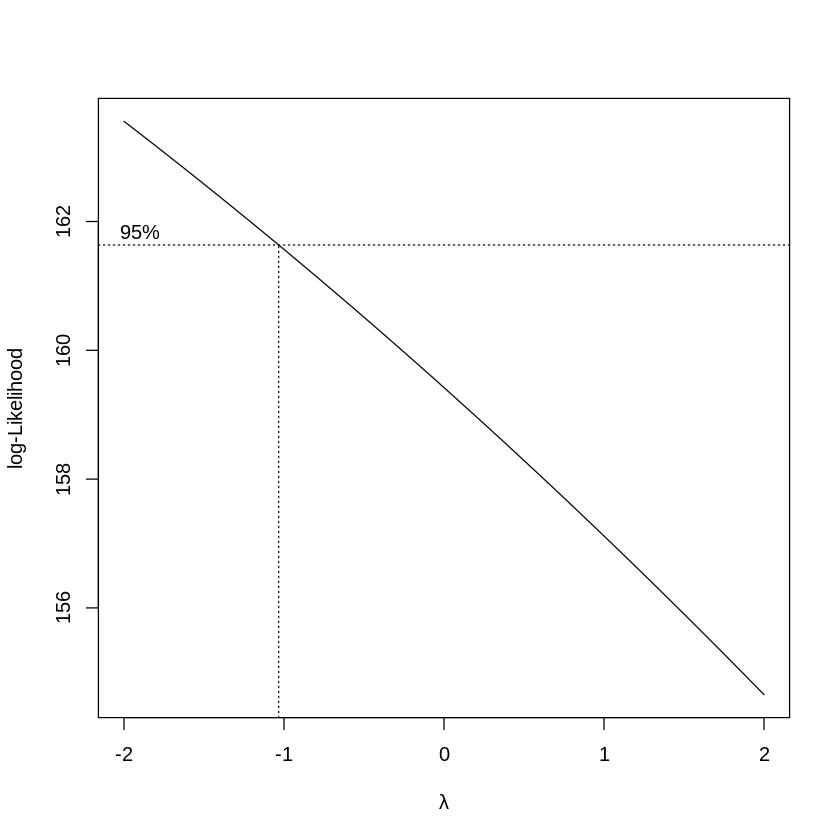

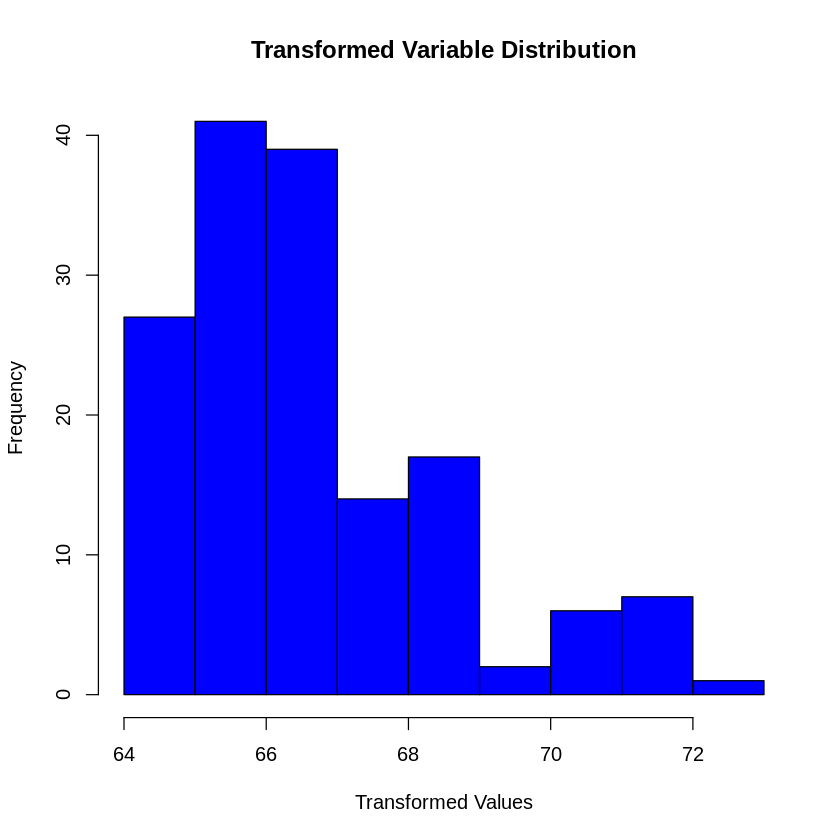

In [ ]:
carwidth_boxcox <- boxcox(carwidth ~ 1, data = final_data2)
optimal_lambda_carwidth <- carwidth_boxcox$x[which.max(carwidth_boxcox$y)]

#final_data2$carwidth <- (final_data2$carwidth^optimal_lambda_carwidth - 1) / optimal_lambda_carwidth

# Assuming 'transformed_response' is your transformed variable
hist(final_data2$carwidth,
     main = "Transformed Variable Distribution",
     xlab = "Transformed Values",
     col = "blue")

Despues de aplicar el proceso de eliminacion de datos atipicos y de transformacion mediante el metodo de boxcox se logro una distribucion que tiende a acercarse a una distribucuon normal acorde a la visualizacion grafica de sus datos como se puede ver en los histogramas anteriores.


## Modelación y verificación del modelo (Portafolio de implementación)


#### Pregunta base

La pregunta base que se establece en este modelo es: ¿El uso de una regresión lineal es optimo para modelar el comportamiento de el dataset presentado?

#### a) Implementacion de herramientas estadísticas para el modelo (Regresión Lineal Simple, Pruena de Hipotesis y ANOVA)

###### 1. Regresion lineal simple

In [ ]:
#implementacion de regresión
regresion_lineal <- lm(final_data2$price ~ final_data2$horsepower + final_data2$curbweight, data = final_data2)
summary(regresion_lineal)



Call:
lm(formula = final_data2$price ~ final_data2$horsepower + final_data2$curbweight, 
    data = final_data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-9344.6 -3061.0  -373.6  2575.2 16104.8 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -95616.940  14765.744  -6.476 1.25e-09 ***
final_data2$horsepower  33470.759   6715.184   4.984 1.68e-06 ***
final_data2$curbweight     10.014      1.098   9.119 4.44e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4514 on 151 degrees of freedom
Multiple R-squared:  0.7063,	Adjusted R-squared:  0.7024 
F-statistic: 181.6 on 2 and 151 DF,  p-value: < 2.2e-16


En este modelo de regresión se terminan utilizando las variables horsepower y curbeweight debido a que despues de distintias iteraciones fueron las que mayor significancia y resultados mostraron en las pruebas finales de la misma.

**Grafica del modelo de regresion lineal en comparacion con datos reales**
A continuacionm se grafica la linea generada por la regresion lineal en comparacion con los datos reales de las variables mas significativas del modelo realizado (enginesieze, horsepower y carwidth).

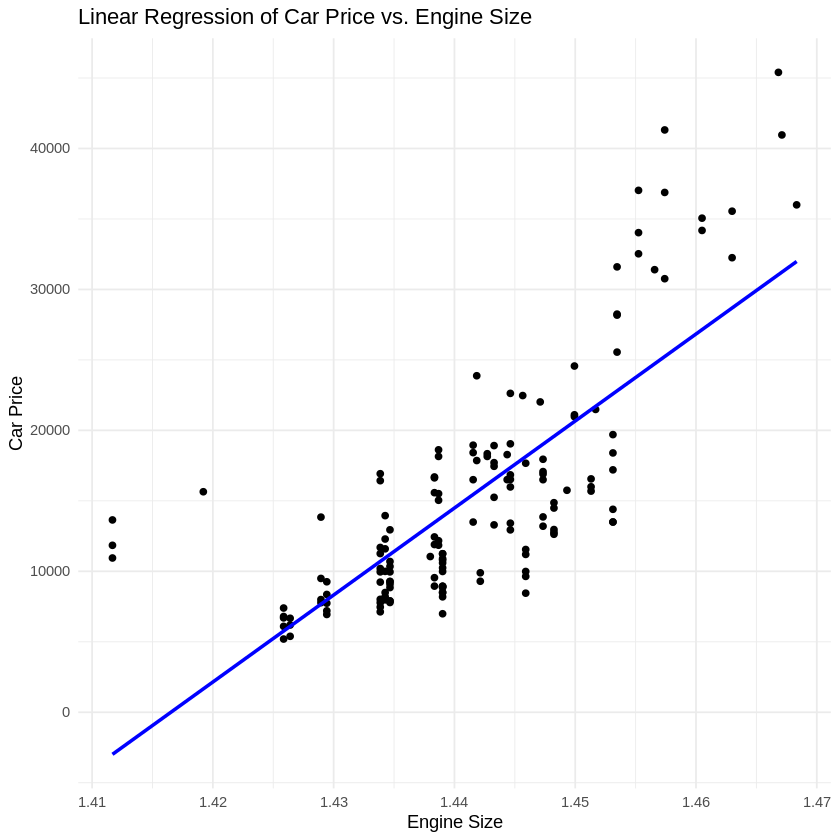

In [ ]:
# Create the scatter plot with the regression line
plot <- ggplot(final_data2, aes(x = final_data2$enginesize, y = final_data2$price)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ x, se = FALSE, color = "blue") +
  labs(title = "Linear Regression of Car Price vs. Engine Size",
       x = "Engine Size",
       y = "Car Price") +
  theme_minimal()

# Print the plot
print(plot)


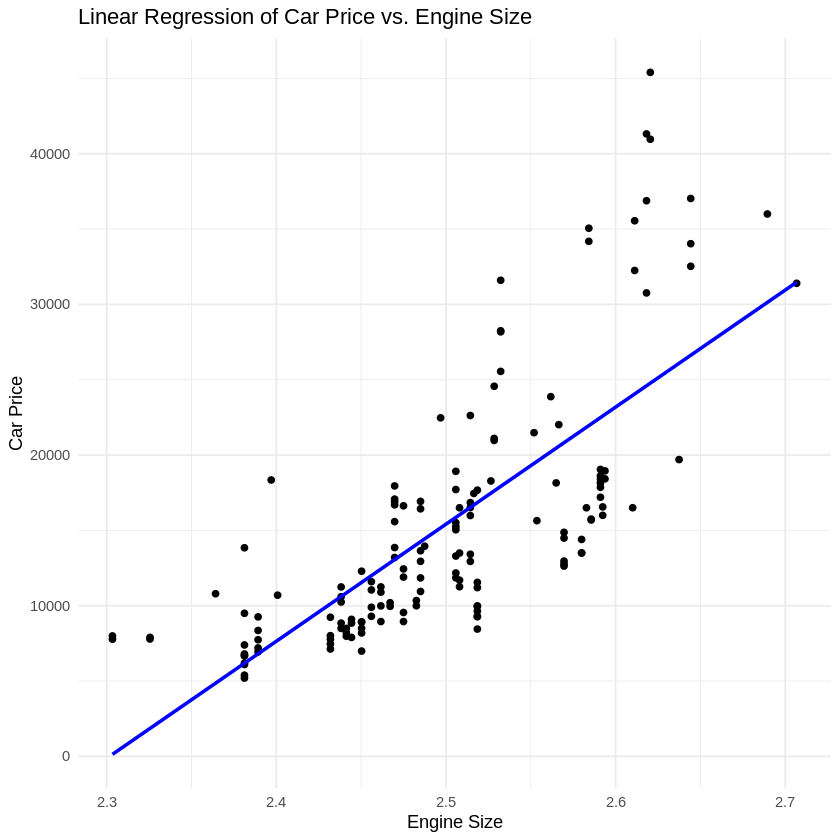

In [ ]:
# Create the scatter plot with the regression line
plot <- ggplot(final_data2, aes(x = final_data2$horsepower, y = final_data2$price)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ x, se = FALSE, color = "blue") +
  labs(title = "Linear Regression of Car Price vs. Engine Size",
       x = "Engine Size",
       y = "Car Price") +
  theme_minimal()

# Print the plot
print(plot)

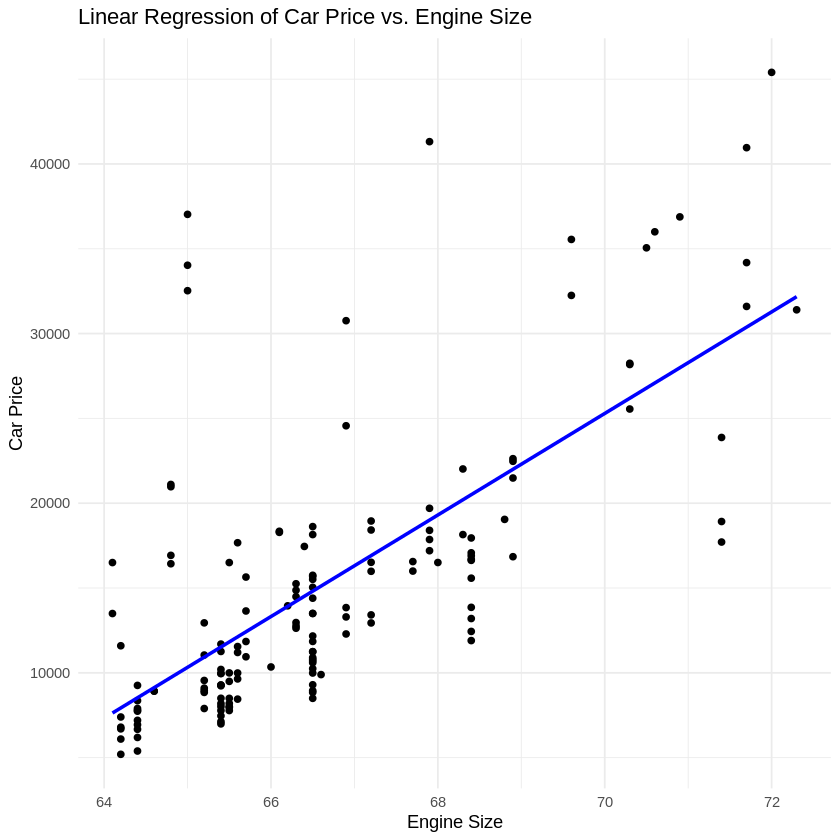

In [ ]:
# Create the scatter plot with the regression line
plot <- ggplot(final_data2, aes(x = final_data2$carwidth, y = final_data2$price)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ x, se = FALSE, color = "blue") +
  labs(title = "Linear Regression of Car Price vs. Engine Size",
       x = "Engine Size",
       y = "Car Price") +
  theme_minimal()

# Print the plot
print(plot)

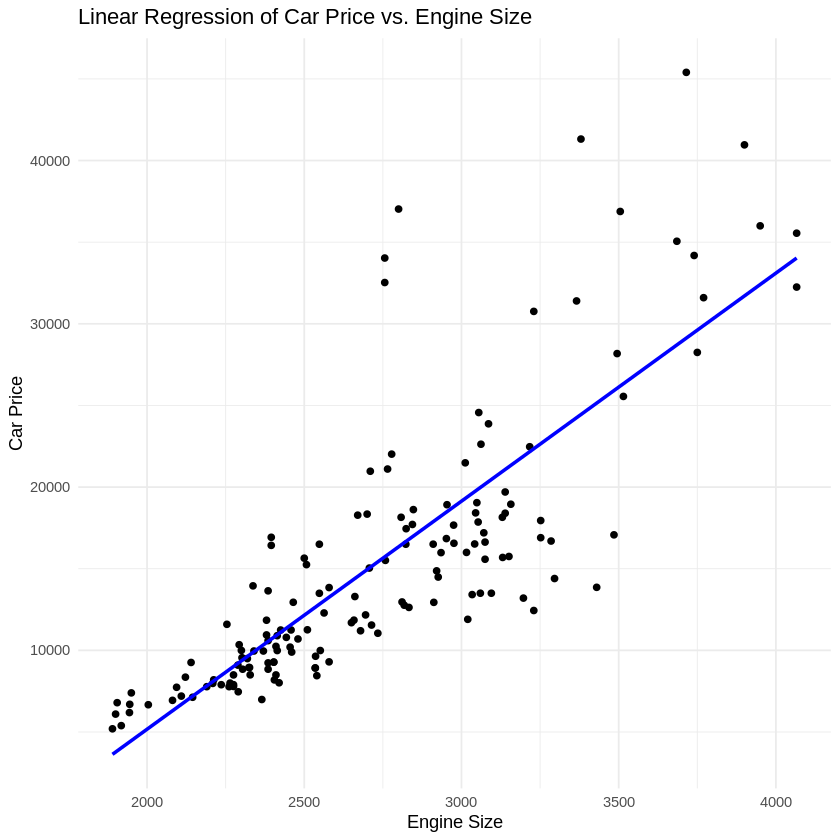

In [ ]:
plot <- ggplot(final_data2, aes(x = final_data2$curbweight, y = final_data2$price)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ x, se = FALSE, color = "blue") +
  labs(title = "Linear Regression of Car Price vs. Engine Size",
       x = "Engine Size",
       y = "Car Price") +
  theme_minimal()

# Print the plot
print(plot)

Como se puede observar, la linea generada por el modelo de regresion lineal se ajusta de manera adecuada a las distintas variables predictoras, siendo un primer indicio de buen desempeño y validez.

###### 2. Analisis por prueba de hipotesis


Se valida la significancia del modelo con la prueba de hipotesis dado que el valor p 2.2e-16 del modelo es menor a 0.05 (valor de tolerancia seleccionado).

Ademas, el modelo desarrollado podemos hacer un analisis de la signficancia de cada una de las variables involucradas en el mismo por medio de la prueba de hipotesis la cual podemos aplicar por medio del valor p de cada variable individual. Con esto en mente, la prueba de hipotesis nos indica que las variables con mayor significancia dentro del modelo dado un valor p menor a 0.05 (valor alfa seleccionado) son: horsepower, curb, cylindernumbereight y cylindernumbertwelve.



###### 3. Analisis ANOVA

In [ ]:
library(dplyr)

# Perform ANOVA analysis on the regression model
anova_result <- anova(regresion_lineal)
print("ANOVA Table:")
print(anova_result)

[1] "ANOVA Table:"
Analysis of Variance Table

Response: final_data2$price
                        Df     Sum Sq    Mean Sq F value    Pr(>F)    
final_data2$horsepower   1 5705436757 5705436757 279.981 < 2.2e-16 ***
final_data2$curbweight   1 1694451598 1694451598  83.151 4.439e-16 ***
Residuals              151 3077071475   20377957                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Despues de distintas iteraciones en el modelo desarrollado podemos hacer un analisis de la signficancia de cada una de las variables involucradas en el mismo por medio de la prueba ANOVA la cual podemos verificar por medio del valor p de cada variable individual. Con esto en mente, la prueba ANOVA nos indica que las variables con mayor significancia dentro del modelo dado un valor p menor a 0.05 (valor alfa seleccionado) son: **horsepower, curbweight**



#### b) Prueba de normalidad de residuos

###### 1. Prueba de hipotesis

  1. Hipotesis: H0 = normalidad en la distribucion de errores, H1 = no normalidad en la distribucion de errores
  2. Regla de decision: Si el valor P > 0.05 no se rechaza la hipotesis incicial por lo que se comprueba su normalidad

In [ ]:
# Prueba de Kolmogorov-Smirnov
residuos <- resid(regresion_lineal)
ks.test(residuos, "pnorm", mean(residuos), sd(residuos))

Warning message in ks.test.default(residuos, "pnorm", mean(residuos), sd(residuos)):
“ties should not be present for the Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  residuos
D = 0.073852, p-value = 0.3704
alternative hypothesis: two-sided


3. Analisis del resultado: despues de hacer la prueba Kolmogorov-Smirnov y complementarlo con la representacion grafica de las distribuciones podemos encontrar un valor P = 0.5922 el cual es mayor a 0.05.
4. Conclusión: debido que valor P > 0.05 no se rechaza la H0 y se afirma que los datos se distribuyen normalmente.

###### 2. Q-Q Plot con distribucion de los quartiles de residuos

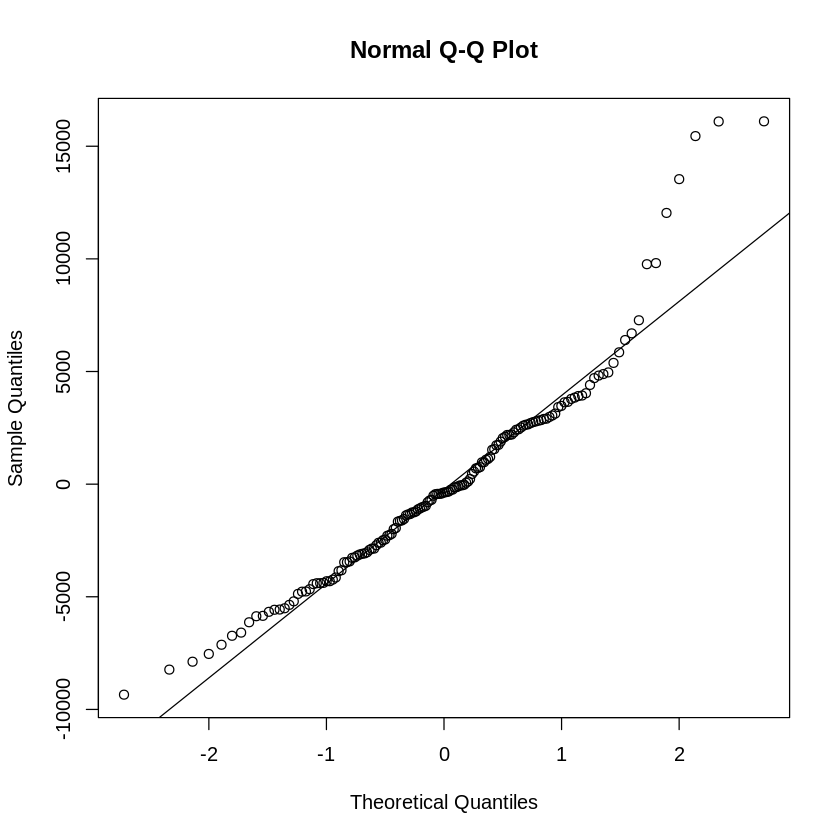

In [ ]:
# Q-Q Plot
qqnorm(residuos)
qqline(residuos)

En este Q-Q plot se puede ver una correcta distribucion al rededor de la diagonal, lo cual otro indicio que confirma la validez del modelo de regresión implementado.

###### 3. Histograma de media de residuos

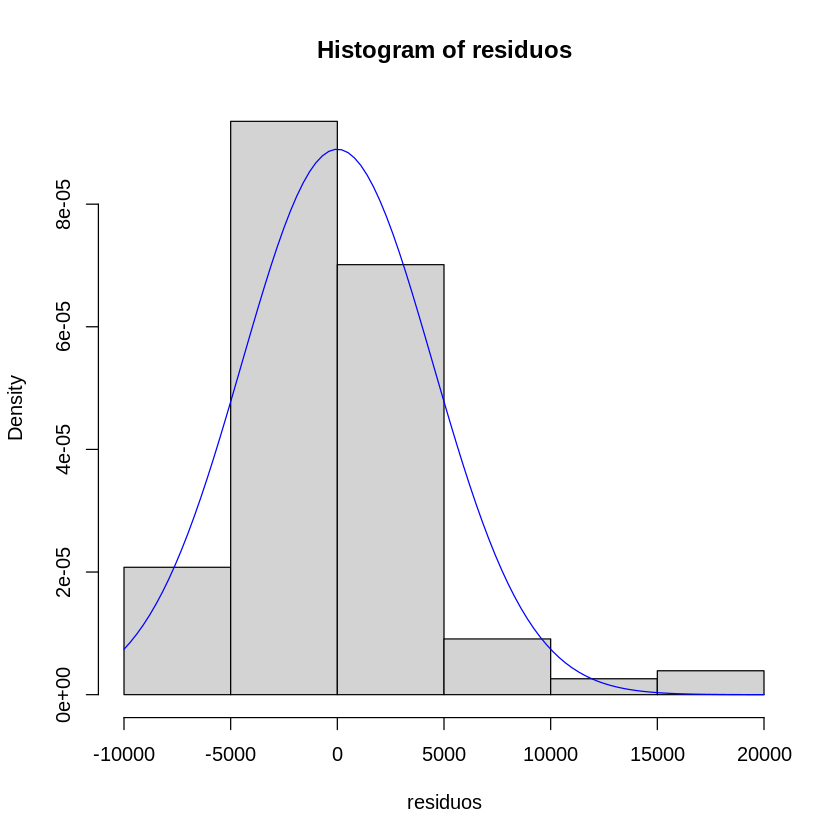

In [ ]:
# Histograma
hist(residuos, probability = TRUE)
curve(dnorm(x, mean = mean(residuos), sd = sd(residuos)), add = TRUE, col = "blue")


En este histograma para ver graficamente la distribucion de los residuos se observa un comportamiento cercano a una distribucion normal.

###### 4.Homocedasticidad

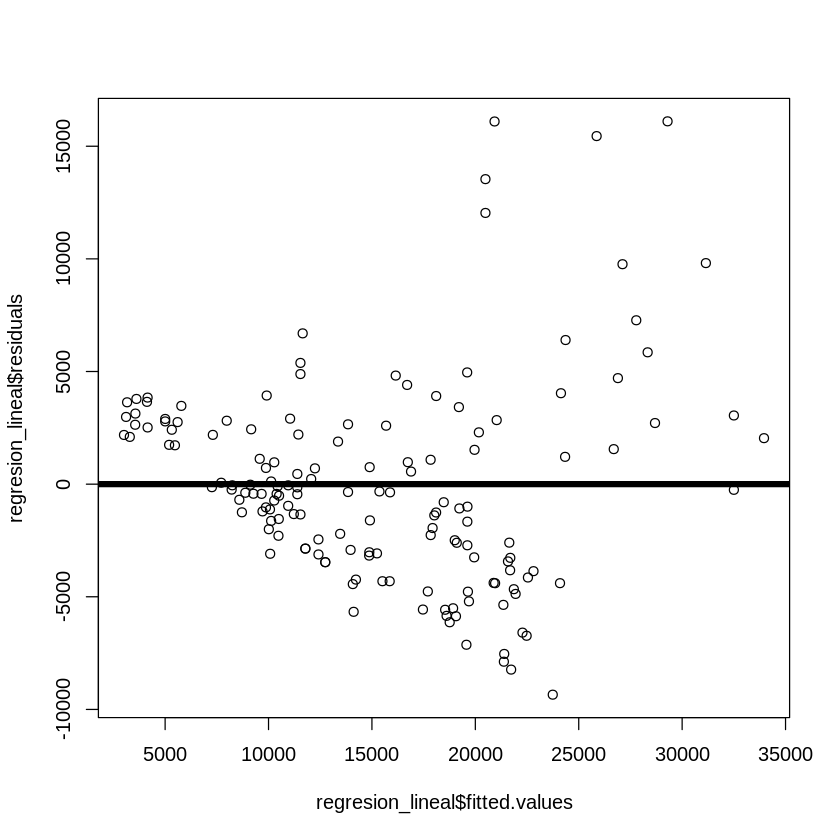

In [ ]:
plot(regresion_lineal$fitted.values,regresion_lineal$residuals)
abline(h=0, lwd=5)

En el analisis de homocedasticidad se puede observar que los residuos del modelo de regresio implementado se distribuyen relativamente de forma uniforme cerca del 0 lo cual es otro factor que apoya a la validez y buen desempeño del modelo.

#### c) Analisis general y validación

Despues de llevar a cabo las pruebas de hipotesis, la prueba ANOVA, grafica del modelo y auste a los datos, pruebas de normalidad de residuos y prueba de homocedasticidad acorde a las variables mas significativas se puede afirmar que el modelo es valido y significativo. Esta afirmacion se ve respaldada por:
  - Resultado de prueba ANOVA que afirma signficancia general del modelo y de las variables predictoras.
  - Resultado de pruebas de hiptesis: al obtener valores P bajos menores a 0.05 se puede corroborar la sifnificancia del modelo y de sus variables predictoras.
  - Representación visual: Al graficar la linea generada por el modelo respecto a las variables mas significantes del modelo se encuentra un ajuste adecuado a la misma.
  - Prueba de normalidad de residuos: al hacer las distintas pruebas graficas y cuantitativas de normalidad de residuos (Kolmogorov-Smirnov test, Histograma, Q-Q Plot y prueba de homocedasticidad) se observa un buen desempeño en las mismas lo cual es un factor mas para la validez del modelo.


## Conclusion

#### Entregable 1

En este primer analisis se pudo aprender sobre el comportamiento de los datos, tanto cualitativos y los cuantitativos. Haciendo uso de funciones de R pudimos conocer sobre las distribuciones, comportamientos, datos atípicos, etc. asi como tambien sobre sus representaciones graficas como los histogramas y los diagramas de caja los cuales nos permitieron seleccionar que variables podrían funcionar mejor para un futuro modelo.

Finalmente, se observo que algunas variables presentan comportamiento no ideal para su implementacion en un modelo por lo que se propone la implementación de una tecnica de transformación para un mejor desempeño.

#### Entegrable 2

En este segundo enteegable el esfuerzo principal estuvo dirigido en la implementacion de un modelo de prediccion, en este caso, una regresion lineal. Los aprendizajes principal de esta etapa fueron los siguientes:
  1. La seleccion de las variables es sumamente importante para mejorar el desempeño del modelo. Para esto podemos apoyarnos de distintas herramientas que nos permiten ver la significancia e impacto de las mismas dentro del modelo.
  2. La limpienza y transformacion de los datos impacta directamente en el resultado del modelo por lo que este proceso toma mucha importancia.
  3. La validacion del modelo no es tan simple como parece y hay que llevar a cabo distintas pruebas, desde el accuracy o valor p del modelo, hasta el analisis de la normalidad de los residuos, de manera que podamos afirmar con la suficiente informacion, la validez del mnodelo.
